In [4]:
pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [7]:
import json
import math
import os
import pandas as pd
import torch
from omegaconf import OmegaConf

In [6]:
pd.set_option('display.max_columns', None)

In [8]:
# Read pickles from the path specified in config.dest_file
config_path = "config_work.yaml"  # Replace with the path to your config file
config = OmegaConf.load(config_path)
df_encoded_path = os.path.join(config.dest_file, "df_encoded.csv")
# Load the DataFrame from the CSV file
df = pd.read_csv(df_encoded_path)

In [9]:
df.head(-5)

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,3.0,1.0,40000.0,40000.0,1500.0,40.0,65.0,0.20,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,56093.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001471,0.000599,0.002724,0.004244,0.000916,0.000017,0.001938,1.483623e-07,0.000036,0.001938,0.000961
1,3.0,1.0,40000.0,25000.0,3000.0,70.0,50.0,0.15,6.6725,0.0,0.5,16.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,43493.360588,0.000004,0.000805,0.000018,0.001366,0.000022,0.001384,0.000567,0.002586,0.004010,0.000853,0.000016,0.001825,1.379114e-07,0.000032,0.001825,0.000874
2,3.0,0.0,40000.0,40000.0,4500.0,100.0,65.0,0.20,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,102993.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001470,0.000599,0.002723,0.004243,0.000916,0.000017,0.001938,1.483223e-07,0.000036,0.001938,0.000960
3,3.0,1.0,10000.0,25000.0,4500.0,70.0,50.0,0.18,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,44993.360588,0.000004,0.000853,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004146,0.000891,0.000017,0.001891,1.439857e-07,0.000034,0.001891,0.000926
4,3.0,0.0,25000.0,25000.0,3000.0,40.0,65.0,0.18,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,67593.360588,0.000004,0.000852,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004145,0.000890,0.000017,0.001890,1.439457e-07,0.000034,0.001890,0.000925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164138,2.0,0.0,40000.0,25000.0,1500.0,40.0,50.0,0.15,6.6725,3.0,0.3,1.0,0.005495,6.677995,100.0,5.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164148 entries, 0 to 164147
Data columns (total 70 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   surfaceProcessingLocationCavity                                164148 non-null  float64
 1   hotRunner                                                      164148 non-null  float64
 2   hotRunnerCost                                                  164148 non-null  float64
 3   manufacturingCost                                              164148 non-null  float64
 4   mouldValidationCost                                            164148 non-null  float64
 5   designTime                                                     164148 non-null  float64
 6   hourlyDesignCost                                               164148 non-null  float64
 7   removedChassis                                 

In [11]:
df.describe()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
count,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000,1.641480e+05,1.641480e+05,164148.0,164148.0,164148.0,164148.0,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.00000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.0,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000
mean,3.000000,0.195409,15862.270634,36722.073982,1606.586739,51.724541,50.532934,0.163086,6.672500e+00,0.769793,0.308290,2.740917,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,1133.808514,4000.0,3.455528,2.275922,0.461194,19.336300,1.319736,9.781782,0.319078,1.0,5381.814874,0.001102,0.147477,0.174690,360.0,14.347540,10185.344933,21.585642,3.501060,2.076979,0.0,0.426347,1.0,5.818901,9.061274,5.43275,4.115469,1.0,41.896764,30.0,6594.545654,3.644126,2000.0,38500.0,66584.271435,0.000040,0.003328,0.000024,0.030269,0.000185,0.030294,0.006191,0.014077,0.023236,0.002927,0.000106,0.019277,1.373095e-06,0.000173,0.019277,0.003792
std,0.554905,0.396516,10592.036270,12479.432960,505.081843,21.184073,2.776695,0.024592,7.269763e-12,1.186966,0.037572,6.279052,3.367976e-15,1.328275e-11,0.0,0.0,0.0,0.0,0.0,2229.091505,0.0,1.700838,2.623105,0.498493,29.477817,0.732969,9.831097,0.466121,0.0,15494.806796,0.000140,0.681254,0.768119,0.0,11.216855,6239.503454,11.208630,1.647026,0.525674,0.0,1.047509,0.0,1.404725,4.282591,3.29176,0.933774,0.0,38.959314,0.0,16912.852510,4.686030,0.0,0.0,15482.078690,0.000101,0.005769,0.000017,0.080793,0.000451,0.080809,0.015016,0.031402,0.051850,0.005354,0.000233,0.048485,3.047302e-06,0.000378,0.048485,0.006825
min,2.000000,0.000000,10000.000000,25000.000000,1500.000000,40.000000,50.000000,0.150000,6.672500e+00,0.000000,0.300000,1.000000,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,50.000000,4000.0,0.000000,1.000000,0.000000,5.000000,1.000000,5.000000,0.000000,1.0,1.000000,0.000920,0.000000,0.000000,360.0,10.000000,8000.000000,12.000000,0.000000,1.000000,0.0,0.000000,1.0,2.000000,2.000000,0.00

In [12]:
df.columns

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName',

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge

In [15]:
df_corr = df.corr()

In [ ]:
#['surfaceProcessingLocationCavity', 'surfaceProcessingLocationChassis', 'injectedMaterial_product', 'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName','machineName', 'EUUSMacchina', 'CNMacchina']

In [17]:
df.shape

(164148, 70)

In [21]:
df_corr[df_corr.columns] = df_corr[df_corr.columns].astype(float)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [40]:
scaler = MinMaxScaler()
scalerStd = StandardScaler()

In [41]:
# scaling the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns, index=df_encoded.index)

In [ ]:
#df_scaled.to_csv('df_scaled.csv', index=False)

In [42]:
df_scaled=pd.read_csv('df_scaled.csv')

In [43]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns, index=df_scaled.index)

In [44]:
df_scaled = pd.DataFrame(scalerStd.fit_transform(df_scaled), columns=df_scaled.columns, index=df_scaled.index)

In [29]:
import dcor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to compute distance correlation for a pair of columns
def compute_distance_correlation(col1, col2):
    return dcor.distance_correlation(col1, col2)

# Function to calculate distance correlation matrix using parallel processing
def distance_correlation_matrix_parallel(df, n_jobs=-1):
    num_vars = df.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_distance_correlation)(df.iloc[:, i].values, df.iloc[:, j].values)
        for i in range(num_vars) for j in range(num_vars)
    )
    
    # Fill the correlation matrix
    for idx, (i, j) in enumerate([(i, j) for i in range(num_vars) for j in range(num_vars)]):
        corr_matrix[i, j] = results[idx]
    
    return corr_matrix

# Function to filter variables by distance correlation threshold
def filter_variables_by_distance_correlation_parallel(df, threshold=0.43, n_jobs=-1):
    corr_matrix = distance_correlation_matrix_parallel(df, n_jobs=n_jobs)
    filtered_corr_matrix = np.where(corr_matrix >= threshold, corr_matrix, 0)
    filtered_corr_df = pd.DataFrame(filtered_corr_matrix, index=df.columns, columns=df.columns)
    return filtered_corr_df


In [58]:
import dcor
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

# Function to compute distance correlation for a pair of columns
def compute_distance_correlation(col1, col2):
    dc = dcor.distance_correlation(col1, col2)
    return min(max(dc, 0.0), 1.0)  # clamp to [0,1] for numerical safety

# Function to calculate distance correlation matrix with categorical handling
def distance_correlation_matrix_parallel(df, n_jobs=-1):
    # One-hot encode categorical variables
    df_encoded = pd.get_dummies(df, drop_first=False)
    
    num_vars = df_encoded.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_distance_correlation)(df_encoded.iloc[:, i].values, df_encoded.iloc[:, j].values)
        for i in range(num_vars) for j in range(num_vars)
    )
    
    # Fill the correlation matrix
    for idx, (i, j) in enumerate([(i, j) for i in range(num_vars) for j in range(num_vars)]):
        corr_matrix[i, j] = results[idx]
    
    return pd.DataFrame(corr_matrix, index=df_encoded.columns, columns=df_encoded.columns)
# Function to filter variables by distance correlation threshold
def filter_variables_by_distance_correlation_parallel(df, threshold=0.43, n_jobs=-1):
    corr_df = distance_correlation_matrix_parallel(df, n_jobs=n_jobs)
    filtered_corr_df = corr_df.where(corr_df >= threshold, 0)
    return filtered_corr_df

def plot_and_save_corr(filtered_corr_df, filter_threshold, dest_file):
        # Plot the filtered heatmap
    filtered_corr_df = filtered_corr_df.loc[(filtered_corr_df != filter_threshold).any(axis=1), (filtered_corr_df != filter_threshold).any(axis=0)]
    plt.figure(figsize=(50, 30))
    sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title(f"Filtered Distance Correlation Heatmap (Threshold ≥ {filter_threshold})")
    #save 
    plt.savefig(os.path.join(config.dest_file, f"corr_graph_{filter_threshold}.png"))
    plt.show()



In [ ]:
filtered_corr_df_one_hot = filter_variables_by_distance_correlation_parallel(df, threshold=0, n_jobs=-1)
filtered_corr_df_one_hot_path = os.path.join(config.dest_file, "df_filtered_one_hot.csv")
filtered_corr_df_one_hot.to_csv(filtered_corr_df_one_hot_path)

In [46]:
filtered_corr_df= filtered_corr_df_one_hot

In [ ]:
#filtered_corr_df = pd.read_csv("filtered_corr_df.csv")

In [47]:
# Remove rows and columns that are all zeros (no significant correlations)
filtered_corr_df = filtered_corr_df.loc[(filtered_corr_df != 0).any(axis=1), (filtered_corr_df != 0).any(axis=0)]

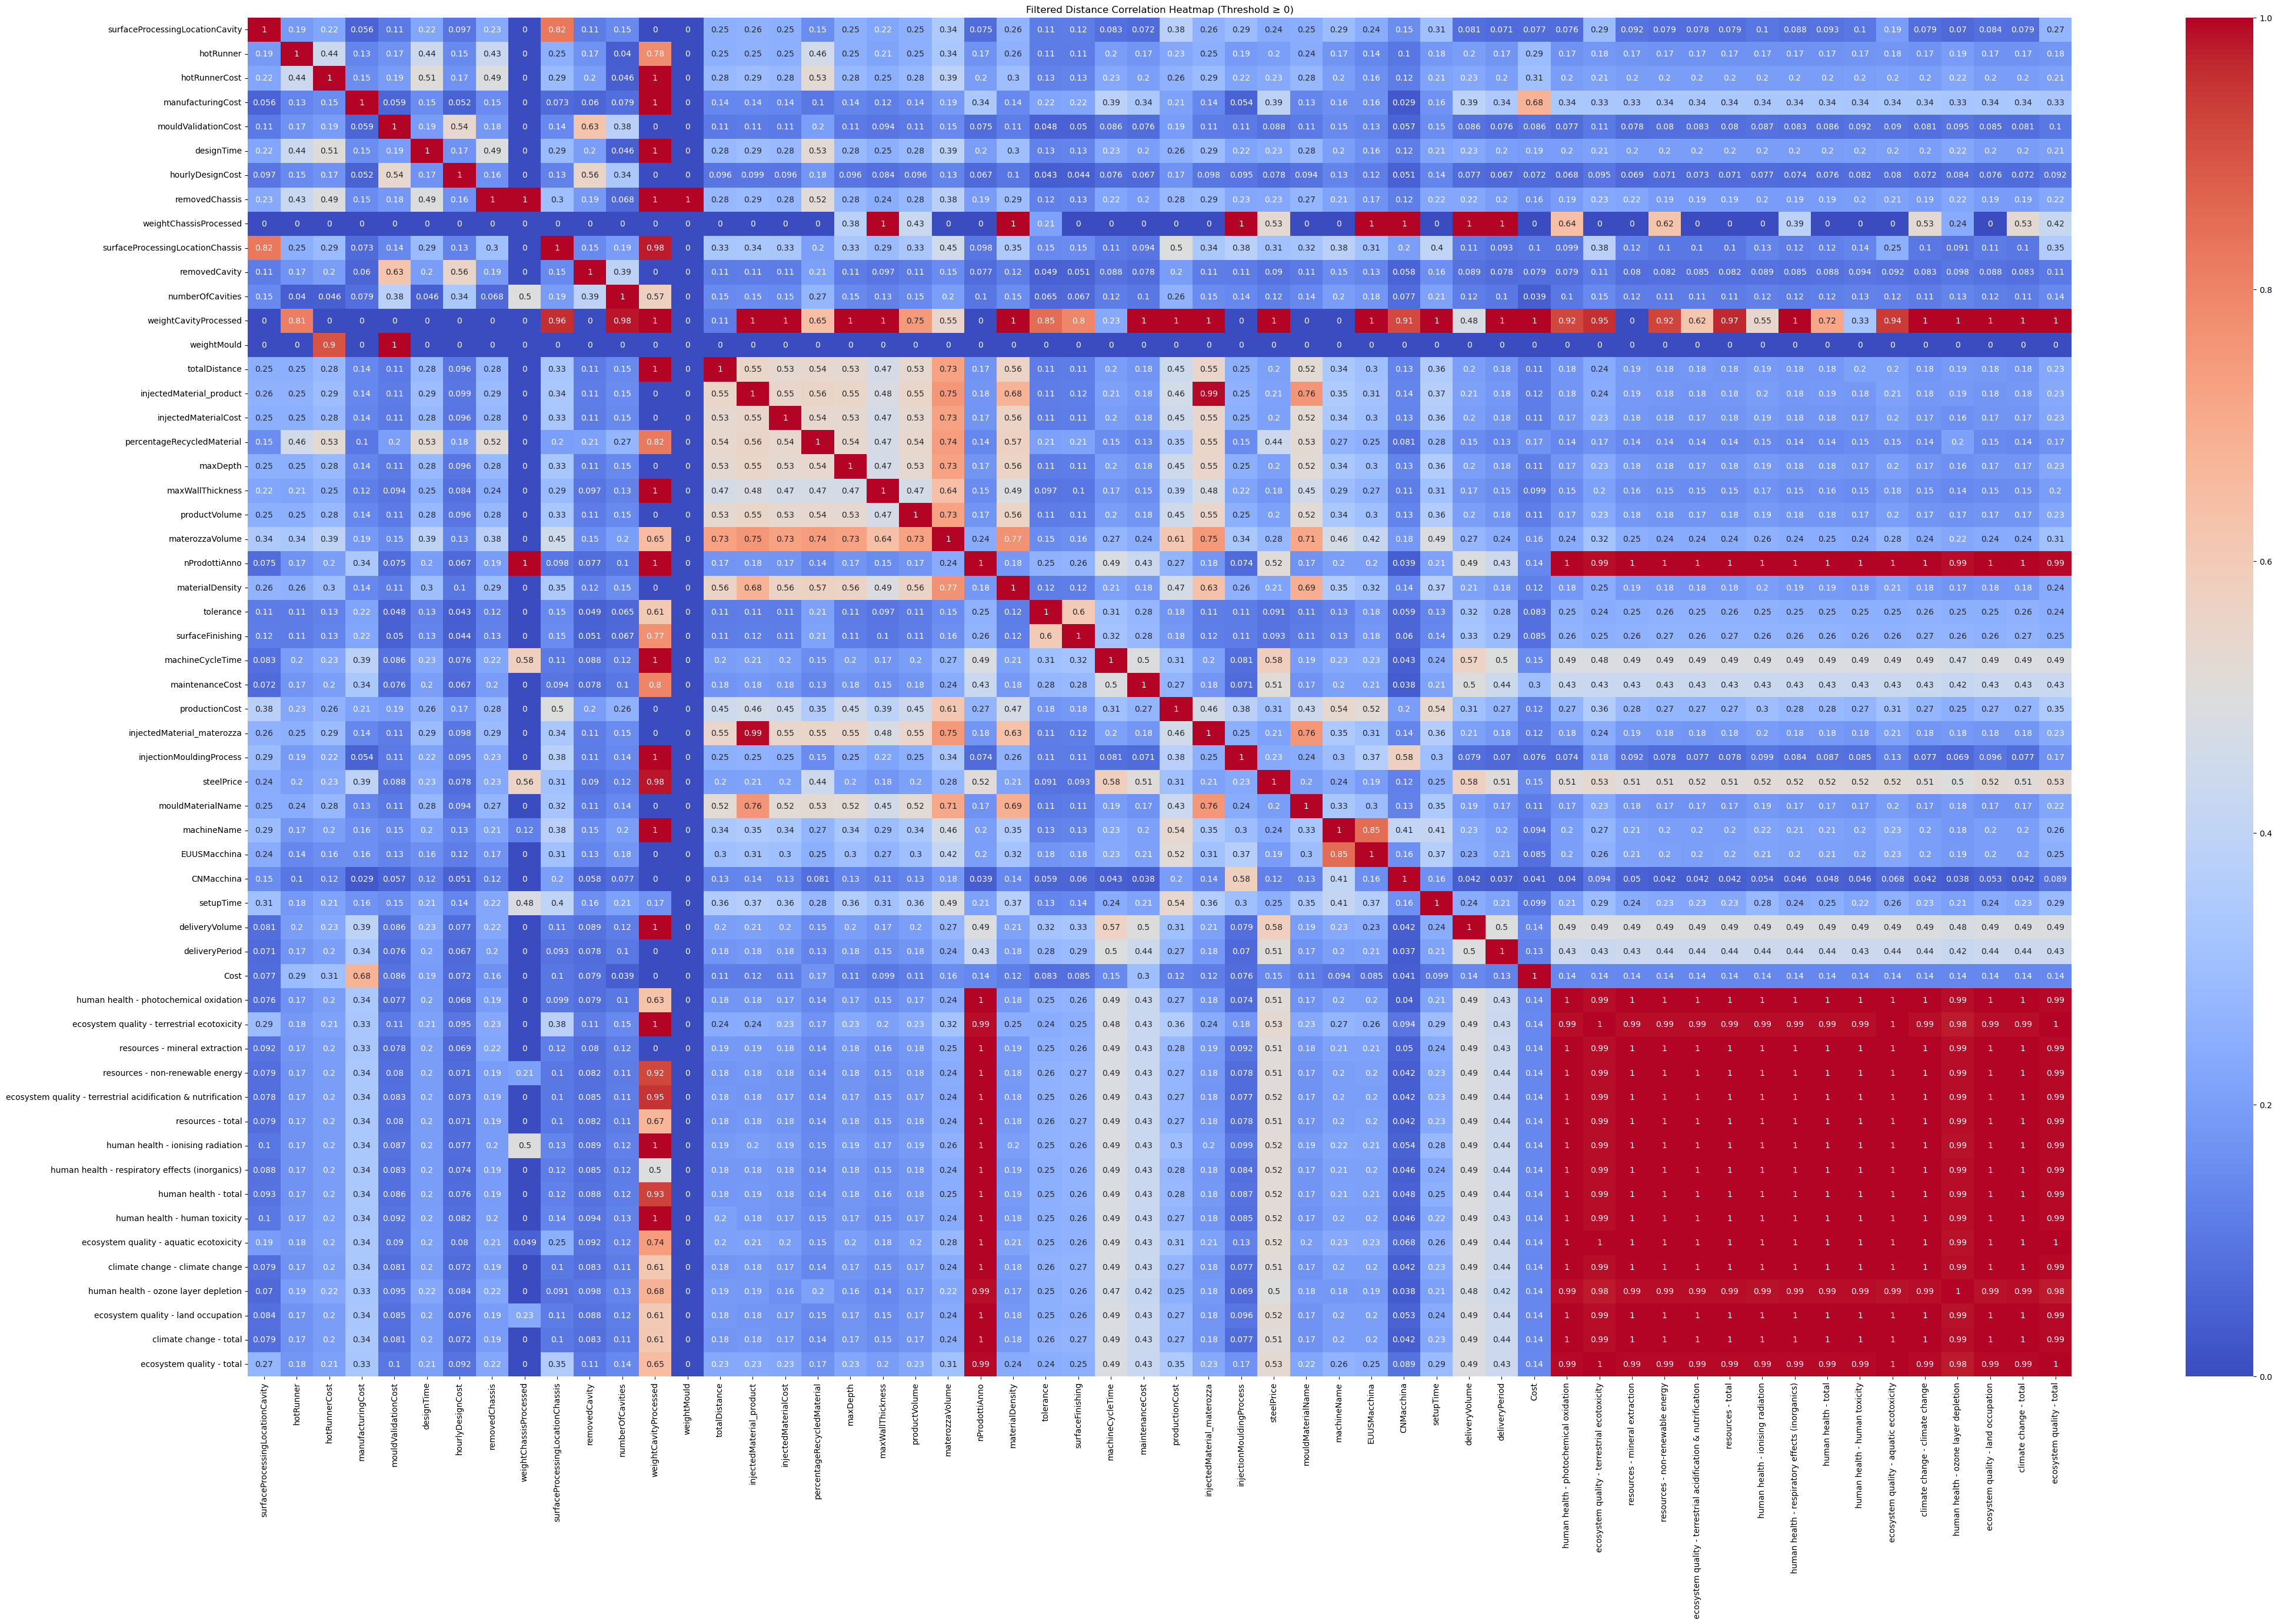

In [59]:
plot_and_save_corr(filtered_corr_df, 0, config.dest_file)

In [ ]:
feature_column = ['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter',
       'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod',
       'mouldDesignCostDisplay', 'mouldTotalCost']

target_column = ['Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosystem quality - terrestrial acidification & nutrification',
       'resources - total', 'human health - ionising radiation',
       'human health - respiratory effects (inorganics)',
       'human health - total', 'human health - human toxicity',
       'ecosystem quality - aquatic ecotoxicity',
       'climate change - climate change',
       'human health - ozone layer depletion',
       'ecosystem quality - land occupation', 'climate change - total',
       'ecosystem quality - total']

We will divide the columns into features and target. and delete the highly correlated ones. 

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store filtered correlations
filtered_correlations = {}

# Assuming target is a DataFrame with multiple columns
for column in target.columns:
    # Calculate correlation with the specific target variable
    corr_with_target = features.corrwith(target[column])
    
    # Filter correlations: keep only those >= 0.1 or <= -0.1
    filtered_corr = corr_with_target[(corr_with_target >= 0.1) | (corr_with_target <= -0.1)]
    
    # Store the filtered correlations in a dictionary
    filtered_correlations[column] = filtered_corr
    
    # Sort the filtered correlations
    filtered_corr = filtered_corr.sort_values(ascending=False)
    
    # Check if there are any correlations to plot
    if not filtered_corr.empty:
        # Plot the heatmap for this target variable
        plt.figure(figsize=(4, 8))
        sns.heatmap(filtered_corr.to_frame(), cmap='GnBu', annot=True)
        plt.title(f'Correlation with Target Variable: {column}')
        plt.show()
    else:
        print(f"No features with correlation >= 0.1 or <= -0.1 for {column}")

# After loop, you can access filtered_correlations for each target variable


NameError: name 'target' is not defined

In [46]:
filtered_corr_df.columns

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'totalDistance', 'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza',
       'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
       'deliveryVolume', 'deliveryPeriod', 'Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosys

In [47]:
# Find non-numeric columns
non_numeric_columns = filtered_corr_df.select_dtypes(exclude=[float, int]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


In [87]:
#df_scaled= pd.read_csv('out11.csv')

In [48]:
input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost'
                      ]

In [49]:
input_variables

['surfaceProcessingLocationCavity',
 'hotRunner',
 'hotRunnerCost',
 'manufacturingCost',
 'mouldValidationCost',
 'designTime',
 'hourlyDesignCost',
 'removedChassis',
 'weightChassisProcessed',
 'surfaceProcessingLocationChassis',
 'removedCavity',
 'numberOfCavities',
 'weightCavityProcessed',
 'weightMould',
 'totalTransportationPercentage',
 'percentageAircraft',
 'percentageLorry',
 'percentageTrain',
 'percentageShip',
 'totalDistance',
 'injectedMaterial_product',
 'injectedMaterialCost',
 'percentageRecycledMaterial',
 'maxDepth',
 'maxWallThickness',
 'productVolume',
 'materozzaVolume',
 'nAnniProduzione',
 'nProdottiAnno',
 'materialDensity',
 'tolerance',
 'surfaceFinishing',
 'cycleTime',
 'machineCycleTime',
 'maintenanceCost',
 'productionCost',
 'transportCost',
 'mouldTotalCost',
 'injectedMaterial_materozza',
 'injectionMouldingProcess',
 'memtiEngineValue',
 'steelPrice',
 'runnersType',
 'mouldMaterialName',
 'machineName',
 'EUUSMacchina',
 'CNMacchina',
 'gateDia

In [50]:
selected_features= selected_features = filtered_corr_df.columns.intersection(input_variables)
selected_outputs = filtered_corr_df.columns.intersection(output_variables)

print(selected_features)
print(selected_outputs)

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'totalDistance', 'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza',
       'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
       'deliveryVolume', 'deliveryPeriod'],
      dtype='object')
Index(['Cost', 'resources - total', 'human health - total',
       'ecosystem quality - total'],
      dtype='object')


In [51]:
features=df_scaled[selected_features]
target= df_scaled[selected_outputs]

In [52]:
target

,Cost,resources - total,human health - total,ecosystem quality - total
0,-0.677618,-0.356677,-0.366296,-0.414860
1,-1.491465,-0.357757,-0.370803,-0.427560
2,2.351700,-0.356681,-0.366314,-0.414903
3,-1.394579,-0.357152,-0.368183,-0.419983
4,0.065178,-0.357156,-0.368201,-0.420027
...,...,...,...,...
164143,-1.491461,-0.342396,-0.339080,-0.405195
164144,-0.070462,-0.331692,-0.319387,-0.401411
164145,1.092176,-0.342747,-0.327733,-0.118626
164146,0.349379,-0.354859,-0.358487,-0.240271


In [53]:
features

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod
0,0.000000,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,-0.648540,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858
1,0.000000,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,-0.648540,5.102484,2.111644,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858
2,0.000000,-0.492816,2.278863,0.262667,5.728620,2.278863,5.210191,1.501052,-0.648540,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858
3,0.000000,2.029155,-0.553462,-0.939314,5.728620,0.862701,-0.191932,0.687772,-0.648540,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858
4,0.000000,-0.492816,0.862701,-0.939314,2.758795,-0.553462,5.210191,0.687772,-0.648540,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.146440,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164143,0.000000,2.029155,-0.553462,-0.939314,-0.211029,2.278863,-0.191932,0.687772,-0.648540,-0.220646,-0.277259,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,1.464444,-0.304222,1.755885,-0.407011,0.128922,2.087230,2.298854,-0.123659,0.593011,-0.389323,-0.350858
164144,0.000000,-0.492816,-0.553462,0.262667,-0.211029,-0.553462,-0.191932,-0.532149,-0.648540,-0.220646,-0.277259,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.141467,-0.304222,1.755885,-0.407011,0.128922,1.620222,1.691274,-0.123659,1.876405,-0.389323,-0.350858
164145,-1.802117,-0.492816,-0.553462,1.464648,-0.211029,2.278863,-0.191932,2.517653,1.878919,-0.220646,-0.277259,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.587553,-0.304222,-0.146440,-0.407011,0.128922,0.686205,1.083694,-0.123659,0.593011,-0.389323,-0.350858
164146,-1.802117,2.029155,2.278863,1.464648,-0.211029,0.862701,-0.191932,-0.532149,1.878919,-0.220646,-0.277259,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.587553,-0.304222,-0.146440,-0.407011,0.128922,0.686205,1.083694,-0.123659,-0.690383,-0.389323,-0.350858


In [54]:
df_selected = pd.concat([features, target], axis=1)

In [55]:
df_selected.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,resources - total,human health - total,ecosystem quality - total
0,0.0,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-0.677618,-0.356677,-0.366296,-0.414860
1,0.0,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,-0.64854,5.102484,2.111644,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.491465,-0.357757,-0.370803,-0.427560
2,0.0,-0.492816,2.278863,0.262667,5.728620,2.278863,5.210191,1.501052,-0.64854,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,2.351700,-0.356681,-0.366314,-0.414903
3,0.0,2.029155,-0.553462,-0.939314,5.728620,0.862701,-0.191932,0.687772,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.394579,-0.357152,-0.368183,-0.419983
4,0.0,-0.492816,0.862701,-0.939314,2.758795,-0.553462,5.210191,0.687772,-0.64854,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,0.065178,-0.357156,-0.368201,-0.420027


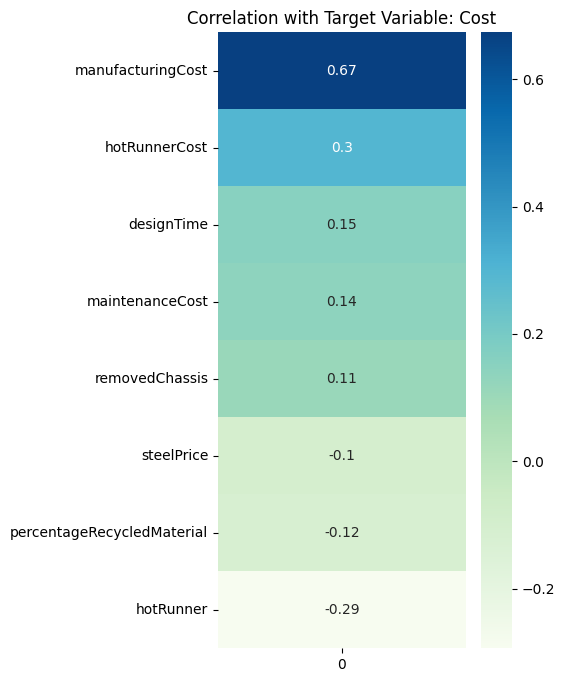

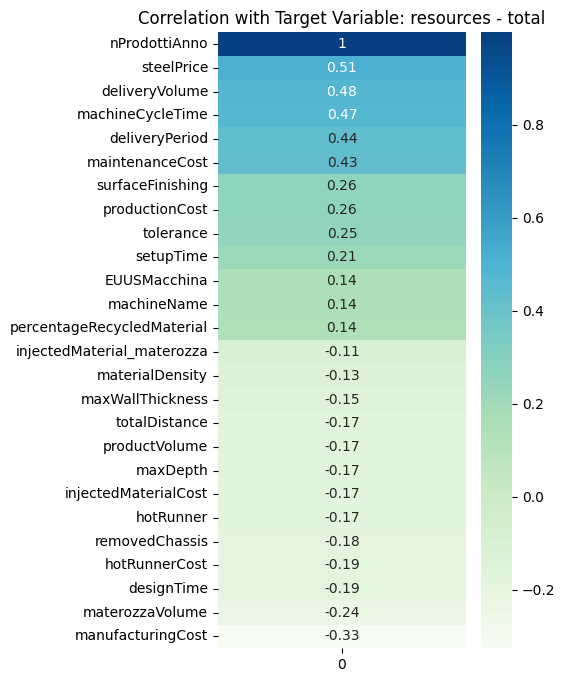

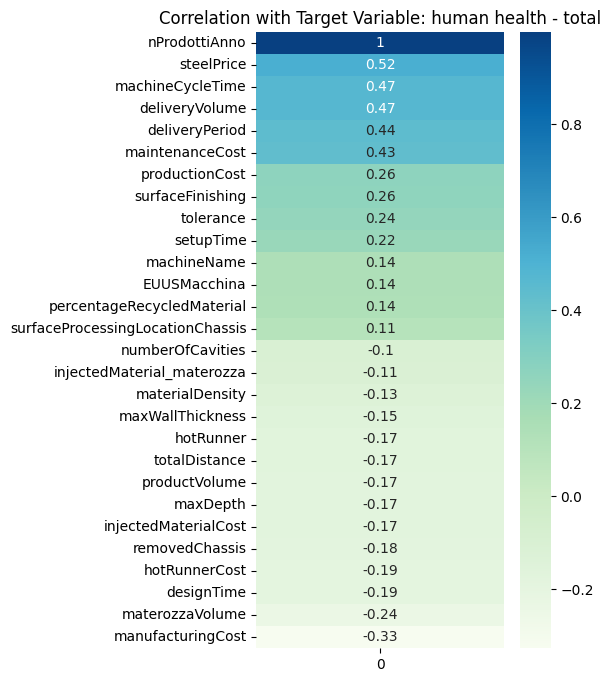

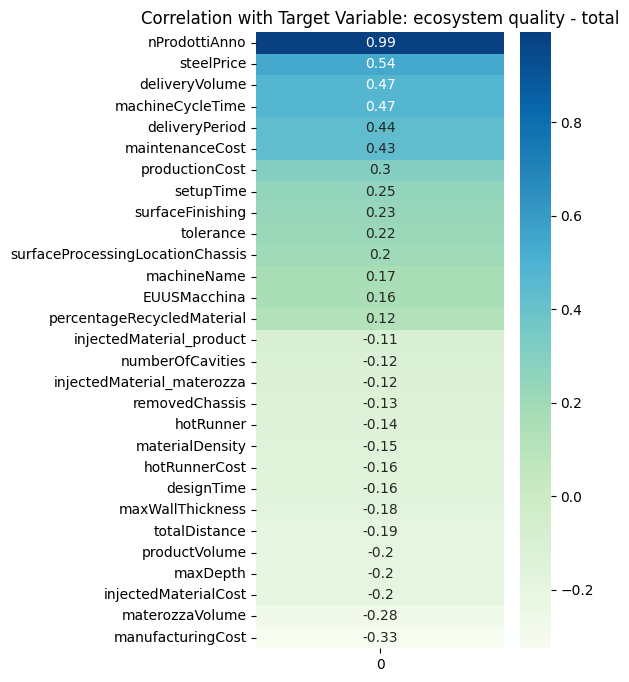

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store filtered correlations
filtered_correlations = {}

# Assuming target is a DataFrame with multiple columns
for column in target.columns:
    # Calculate correlation with the specific target variable
    corr_with_target = features.corrwith(target[column])
    
    # Filter correlations: keep only those >= 0.1 or <= -0.1
    filtered_corr = corr_with_target[(corr_with_target >= 0.1) | (corr_with_target <= -0.1)]
    
    # Store the filtered correlations in a dictionary
    filtered_correlations[column] = filtered_corr
    
    # Sort the filtered correlations
    filtered_corr = filtered_corr.sort_values(ascending=False)
    
    # Check if there are any correlations to plot
    if not filtered_corr.empty:
        # Plot the heatmap for this target variable
        plt.figure(figsize=(4, 8))
        sns.heatmap(filtered_corr.to_frame(), cmap='GnBu', annot=True)
        plt.title(f'Correlation with Target Variable: {column}')
        plt.show()
    else:
        print(f"No features with correlation >= 0.1 or <= -0.1 for {column}")

# After loop, you can access filtered_correlations for each target variable


In [57]:
filtered_corr_df.head(2)

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,1.000000,0.191297,0.221012,0.00000,0.108879,0.221012,0.000000,0.230721,0.824925,0.111683,0.146933,0.251479,0.259865,0.251587,0.154946,0.251601,0.219499,0.251603,0.344450,0.000000,0.264585,0.111935,0.115151,0.000000,0.000000,0.381401,0.258050,0.289325,0.238611,0.245275,0.290923,0.239164,0.154428,0.307393,0.000000,0.000000,0.000000,0.000000,0.291167,0.000000,0.0000,0.000000,0.0000,0.100944,0.000000,0.000000,0.103597,0.194427,0.000000,0.000000,0.000000,0.000000,0.270859
1,0.191297,1.000000,0.437370,0.13359,0.166216,0.437370,0.147436,0.428236,0.249830,0.170498,0.000000,0.246298,0.254511,0.246403,0.455942,0.246417,0.214977,0.246419,0.337353,0.171139,0.259133,0.109628,0.112778,0.196199,0.172606,0.225832,0.252733,0.187622,0.200582,0.240221,0.172720,0.137200,0.100144,0.182591,0.197004,0.172908,0.292934,0.171528,0.180225,0.172394,0.1709,0.170935,0.1709,0.171342,0.170803,0.170724,0.172631,0.176108,0.170848,0.194464,0.170422,0.170848,0.179047


In [174]:
print(filtered_correlations['Cost'])


TypeError: 'function' object is not subscriptable

In [59]:
target.columns

Index(['Cost', 'resources - total', 'human health - total',
       'ecosystem quality - total'],
      dtype='object')

In [175]:
features_human_health_total = filtered_correlations['human health - total'].index,
features_ecosystem_quality_total = filtered_correlations['ecosystem quality - total'].index,
features_resources_total = filtered_correlations['resources - total'].index,
features_cost = filtered_correlations['Cost'].index

TypeError: 'function' object is not subscriptable

In [ ]:
merged_features=

In [ ]:
splitvar

In [78]:
concat_results = []

for i in filtered_correlations:
    for j in selected_features:
        # Perform concatenation if you want columns side by side
        df_concat = df_scaled[j]
        
        # Store the concatenated DataFrame
        concat_results.append(df_concat)
        
        # Print the concatenated DataFrame
        print(df_concat)
    df_concat = pd.concat([df_concat, df_scaled[i], axis=1])

# If you want all results combined into a single DataFrame
final_df = pd.concat(concat_results, axis=1)
print("\nFinal concatenated DataFrame:")
print(final_df)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3387791354.py, line 13)

In [ ]:
# List to store concatenated results
concat_results = []

for i in filtered_correlations:
    # Initialize a temporary DataFrame for each iteration over filtered_correlations
    temp_df = pd.DataFrame()

    for j in selected_features:
        # Concatenate selected features and store them temporarily
        temp_df = pd.concat([temp_df, df_scaled[[j]]], axis=1)

    # Concatenate the result of filtered_correlations column as well
    temp_df = pd.concat([temp_df, df_scaled[[i]]], axis=1)
    
    # Append the resulting DataFrame to the results list
    concat_results.append(temp_df)

# Concatenate all results into a single DataFrame
final_df = pd.concat(concat_results, axis=0, ignore_index=True)

print("\nFinal concatenated DataFrame:")
final_df.head()

In [75]:
final_df.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,resources - total,human health - total,ecosystem quality - total
0,0.0,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-0.677618,NaN,NaN,NaN
1,0.0,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,-0.64854,5.102484,2.111644,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.491465,NaN,NaN,NaN
2,0.0,-0.492816,2.278863,0.262667,5.728620,2.278863,5.210191,1.501052,-0.64854,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,2.351700,NaN,NaN,NaN
3,0.0,2.029155,-0.553462,-0.939314,5.728620,0.862701,-0.191932,0.687772,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.394579,NaN,NaN,NaN
4,0.0,-0.492816,0.862701,-0.939314,2.758795,-0.553462,5.210191,0.687772,-0.64854,-0.220646,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,0.065178,NaN,NaN,NaN


In [85]:
df_selected.head(2)

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,totalDistance,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,steelPrice,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,setupTime,deliveryVolume,deliveryPeriod,Cost,resources - total,human health - total,ecosystem quality - total
0,0.0,2.029155,2.278863,0.262667,-0.211029,-0.553462,5.210191,1.501052,-0.64854,5.102484,4.659807,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-0.677618,-0.356677,-0.366296,-0.41486
1,0.0,2.029155,2.278863,-0.939314,2.758795,0.862701,-0.191932,-0.532149,-0.64854,5.102484,2.111644,-0.486212,-0.267826,-0.486418,-0.925178,-0.486343,-0.436221,-0.486395,-0.684541,-0.347267,-0.368406,-0.216479,-0.227426,-0.387591,-0.350244,-0.855205,-0.304222,-0.14644,-0.407011,0.128922,-0.481316,-0.435255,-0.123659,-0.690383,-0.389323,-0.350858,-1.491465,-0.357757,-0.370803,-0.42756


In [87]:
df_scaled= df_selected[target.columns].copy

In [89]:
df_scaled.head()

AttributeError: 'function' object has no attribute 'head'

In [86]:
features_ecosystem_quality_total

(Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
        'removedChassis', 'surfaceProcessingLocationChassis',
        'numberOfCavities', 'totalDistance', 'injectedMaterial_product',
        'injectedMaterialCost', 'percentageRecycledMaterial', 'maxDepth',
        'maxWallThickness', 'productVolume', 'materozzaVolume', 'nProdottiAnno',
        'materialDensity', 'tolerance', 'surfaceFinishing', 'machineCycleTime',
        'maintenanceCost', 'productionCost', 'injectedMaterial_materozza',
        'steelPrice', 'machineName', 'EUUSMacchina', 'setupTime',
        'deliveryVolume', 'deliveryPeriod'],
       dtype='object'),)

In [90]:
from joblib import cpu_count

In [91]:
cpu_count()

12

In [92]:
def get_selected_indices(filtered_correlations, filtered_corrne):
    """
    This function iterates over filtered_correlations and returns the indices
    from df_scaled for the specified columns.

    :param filtered_correlations: List of column names or indices to filter on.
    :param df_scaled: DataFrame from which to extract the indices.
    :return: List of indices for the specified columns.
    """
    # Initialize an empty list to store the indices
    all_selected_indices = []

    # Loop over each item in filtered_correlations
    for i in filtered_correlations:
        # Extract the indices for the current column i
        df_selected = filtered_correlations[i].index
        # Append the extracted indices to the list
        all_selected_indices.append(df_selected)

    # Return the list of all selected indices
    return all_selected_indices

# Example usage:
# Assuming filtere_correlations and df_scaled are defined elsewhere
selected_indices = get_selected_indices(filtered_correlations, filtered_correlations)
print(selected_indices)


[Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'percentageRecycledMaterial', 'maintenanceCost',
       'steelPrice'],
      dtype='object'), Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'totalDistance', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
       'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
       'productionCost', 'injectedMaterial_materozza', 'steelPrice',
       'machineName', 'EUUSMacchina', 'setupTime', 'deliveryVolume',
       'deliveryPeriod'],
      dtype='object'), Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'surfaceProcessingLocationChassis',
       'numberOfCavities', 'totalDistance', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWa

In [94]:
df_selected = df_scaled[filtered_correlations]


TypeError: 'method' object is not subscriptable

In [95]:
df_selected= df_scaled[selected_indices.index]

TypeError: 'method' object is not subscriptable

In [61]:
# Initialize an empty list to store the indices
all_selected_indices = []

# Loop over each item in filtered_correlations
for i in filtered_correlations:
    # Extract the indices for the current column i
    df_selected = df_scaled[i].index
    # Append the extracted indices to the list
    all_selected_indices.append(df_selected)

# Return the list of all selected indices
    return all_selected_indices



SyntaxError: 'return' outside function (3017288582.py, line 12)

In [52]:
for i in filtered_correlations:
    df_selected = df_scaled["i"].index
    return df_selected

SyntaxError: 'return' outside function (4031556492.py, line 3)

In [43]:
features_cost

Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'percentageRecycledMaterial', 'maintenanceCost',
       'steelPrice'],
      dtype='object')

In [45]:
X = df_scaled[features_cost]
X

,hotRunner,hotRunnerCost,manufacturingCost,designTime,removedChassis,percentageRecycledMaterial,maintenanceCost,steelPrice
0,1.0,1.0,0.5,0.0,0.666667,0.0,0.0,0.0
1,1.0,1.0,0.0,0.5,0.000000,0.0,0.0,0.0
2,0.0,1.0,0.5,1.0,0.666667,0.0,0.0,0.0
3,1.0,0.0,0.0,0.5,0.400000,0.0,0.0,0.0
4,0.0,0.5,0.0,0.0,0.400000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
164143,1.0,0.0,0.0,1.0,0.400000,0.0,0.0,0.0
164144,0.0,0.0,0.5,0.0,0.000000,0.0,0.0,0.0
164145,0.0,0.0,1.0,1.0,1.000000,0.0,0.0,0.0
164146,1.0,1.0,1.0,0.5,0.000000,0.0,0.0,0.0


In [259]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164148 entries, 0 to 164149
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   hotRunner                   164148 non-null  float64
 1   hotRunnerCost               164148 non-null  float64
 2   manufacturingCost           164148 non-null  float64
 3   designTime                  164148 non-null  float64
 4   removedChassis              164148 non-null  float64
 5   percentageRecycledMaterial  164148 non-null  float64
 6   maintenanceCost             164148 non-null  float64
 7   steelPrice                  164148 non-null  float64
dtypes: float64(8)
memory usage: 11.3 MB


In [261]:
X.describe()

,hotRunner,hotRunnerCost,manufacturingCost,designTime,removedChassis,percentageRecycledMaterial,maintenanceCost,steelPrice
count,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000
mean,0.195409,0.195409,0.390736,0.195409,0.174486,0.461194,0.109267,0.142116
std,0.396516,0.353068,0.415981,0.353068,0.327891,0.498493,0.311975,0.349170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.500000,1.000000,0.500000,0.400000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [276]:
dim=X.shape[1]

In [144]:
output_variables_F= ['Cost','human health - total','ecosystem quality - total','resources - total','climate change - total']

In [250]:
output_variables_F.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [ ]:
for i in output_variables_F.shape[1]:
    df_

In [148]:
'''
feature_cols = ['hotRunner',
 'hotRunnerCost',
 'manufacturingCost',
 'mouldValidationCost',
 'designTime',
 'hourlyDesignCost',
 'removedChassis',
 'removedCavity',
 'numberOfCavities']
'''

label_col = [
 'Cost']

'human health - photochemical oxidation',
 'human health - respiratory effects (inorganics)',
 'human health - total',
 'human health - human toxicity',
 'human health - ozone layer depletion',
 'ecosystem quality - terrestrial ecotoxicity',
 'ecosystem quality - terrestrial acidification & nutrification',
 'ecosystem quality - aquatic ecotoxicity',
 'ecosystem quality - land occupation',
 'ecosystem quality - total',
 'resources - mineral extraction',
 'resources - non-renewable energy',
 'resources - total',
 'human health - ionising radiation','climate change - climate change',
 'climate change - total'

In [284]:
y.shape[1]

1

In [149]:
y_relevant=label_col

In [99]:
y = df_scaled[y_relevant]

NameError: name 'y_relevant' is not defined

In [152]:
import pandas
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import the necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn import metrics

# use month, mintemp, and meantemp to predict max temp

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [158]:
# prompt: define GridSearchCV and MLPregressor

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

# Define the parameter grid for GridSearchCV



In [159]:
def mlp_model(X, Y):

    estimator=MLPRegressor()


    param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
              'activation': ['relu','tanh','logistic'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive'],
              'solver': ['adam']}

    gsc = GridSearchCV(
        estimator,
        param_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, Y)


    best_params = grid_result.best_params_

    best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"],
                            activation =best_params["activation"],
                            solver=best_params["solver"],
                            max_iter= 50000, n_iter_no_change = 200
                  )

    scoring = {
              'abs_error': 'neg_mean_absolute_error',
              'squared_error': 'neg_mean_squared_error',
              'r2':'r2'}

    scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)
    return scores

In [ ]:
mlp_model(X,y)

In [219]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164148 entries, 0 to 164149
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   hotRunner                   164148 non-null  float64
 1   hotRunnerCost               164148 non-null  float64
 2   manufacturingCost           164148 non-null  float64
 3   designTime                  164148 non-null  float64
 4   removedChassis              164148 non-null  float64
 5   percentageRecycledMaterial  164148 non-null  float64
 6   maintenanceCost             164148 non-null  float64
 7   steelPrice                  164148 non-null  float64
dtypes: float64(8)
memory usage: 11.3 MB


In [220]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164148 entries, 0 to 164149
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Cost    164148 non-null  float64
dtypes: float64(1)
memory usage: 2.5 MB


In [96]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import re
import time
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
1.0073947202285034e-05, 1.1581808634566612e-06, 128, 10

In [164]:
class F_Predictor(nn.Module):
    def __init__(self, input_dim=8,layer1=512,layer2=256,drp=.2,output=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,layer1),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer1,layer2),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer2,output)
        )
    def forward(self,input):
        return self.net(input)

In [98]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2019)
print(x_train.shape,
y_train.shape,
y_test.shape,
x_test.shape)

NameError: name 'X' is not defined

In [ ]:
def training(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,lr=0.001,l2=0.001,batch_size=64,epochs=30):
    torch.manual_seed(0)
    losses=[]
    x_train, y_train, x_test, y_test= map(
    torch.FloatTensor, (x_train.values, y_train.values,x_test.values,y_test.values)
    )
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    model = F_Predictor()
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=l2)
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch==0 or  epoch % 2 == 0:
            print(loss)
        losses.append(loss.item())
    plt.plot(losses)
    model.eval()
    mse = mean_squared_error(model(x_test).detach().numpy(),y_test.detach().numpy())
    print('RMSE on test set: {}'.format(np.sqrt(mse)))
    return -mse

In [84]:
pip install bayesian-optimization


Note: you may need to restart the kernel to use updated packages.


In [167]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import load_logs

pbounds = {
    'lr': (1e-5, 1e-2),
    'l2': (1e-5, 1e-2)
    }


optimizer = BayesianOptimization(
    f=training,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
)


|   iter    |  target   |    l2     |    lr     |
-------------------------------------------------
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0024, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0022, grad_fn=<MseLossBackward0>)
tensor(0.0031, grad_fn=<MseLossBackward0>)
tensor(0.0018, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0060, grad_fn=<MseLossBackward0>)
tensor(0.0020, grad_fn=<MseLossBackward0>)
tensor(0.0021, grad_fn=<MseLossBackward0>)
tensor(0.0023, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
tensor(0.0022, grad_fn=<MseLossBackward0>)
tensor(0.0014, grad_fn=<MseLossBackward0>)
tensor(0.0022, grad_fn=<MseLossBackward0>)
tensor(0.0019, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.035731252282857895
| 1         | -0.001277 | 0.004176  | 0.007206  |
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) t

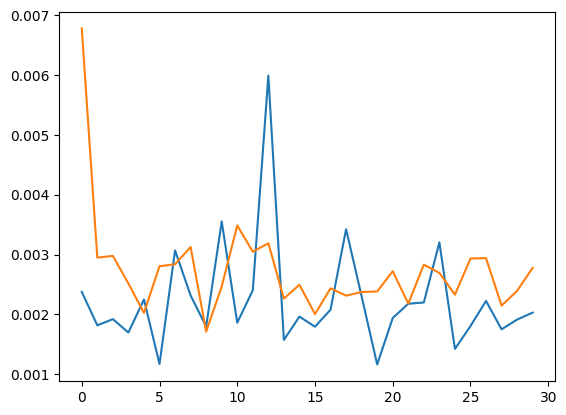

In [168]:
start = time.time()
optimizer.maximize(init_points=1, n_iter=1)
end = time.time()
print('Bayes optimization takes {:.2f} seconds to tune'.format(end - start))
print(optimizer.max)

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.2214, grad_fn=<MseLossBackward0>)
tensor(0.1829, grad_fn=<MseLossBackward0>)
tensor(0.1506, grad_fn=<MseLossBackward0>)
tensor(0.1237, grad_fn=<MseLossBackward0>)
tensor(0.1019, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.3338211178779602


-0.11143654

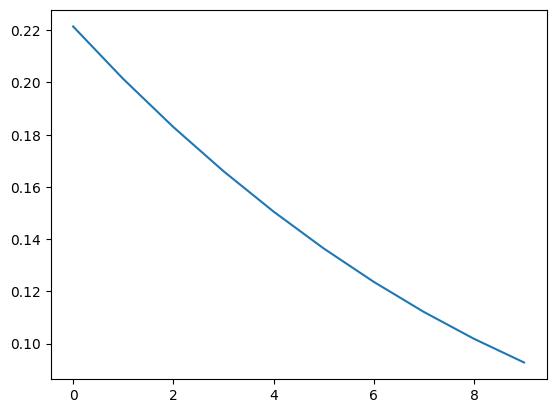

In [186]:
training(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test,lr=1.0073947202285034e-05,l2= 1.1581808634566612e-06,batch_size=128,epochs=10)

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0406, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0408, grad_fn=<MseLossBackward0>)
tensor(0.0408, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0408, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0407, grad_fn=<MseLossBackward0>)
tensor(0.0409, grad_fn=<MseLossBackward0>)
tensor(0.0406, grad_fn=<MseLossBackward0>)
tensor(0.0406, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.20056632161140442


-0.040226847

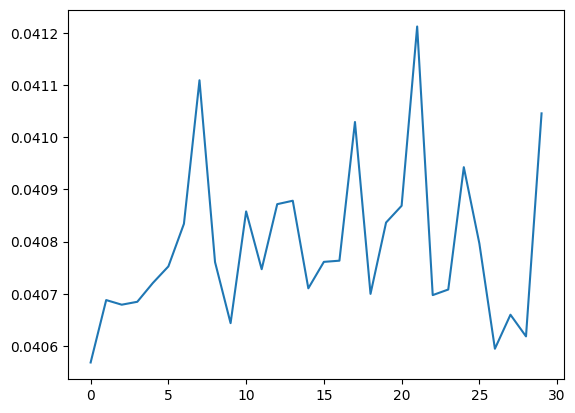

In [169]:
training(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test,lr=0.004176049826978714,l2= 0.007206041689487159,batch_size=64,epochs=30)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [180]:
 pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [ ]:
F_Predictor

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0027, grad_fn=<MseLossBackward0>)
tensor(0.0025, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
tensor(0.0026, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.0553915798664093
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.2572, grad_fn=<MseLossBackward0>)
tensor(0.1584, grad_fn=<MseLossBackward0>)
tensor(0.1019, grad_fn=<MseLossBackward0>)
t

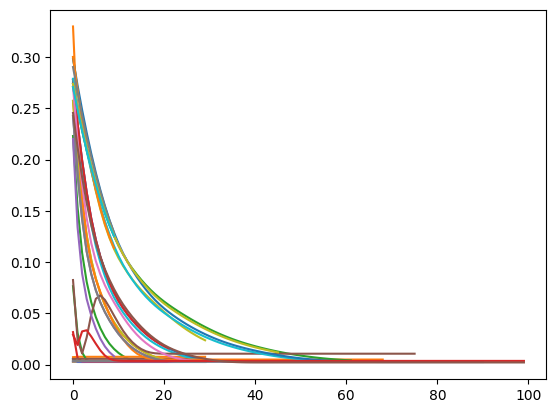

In [184]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skopt import gp_minimize
from skopt.space import Real, Integer

# Dummy Model Definition for the sake of example
class F_Predictor(nn.Module):
    def __init__(self):
        super(F_Predictor, self).__init__()
        self.layer = nn.Linear(8, 1)  # assuming input features = 10

    def forward(self, x):
        return self.layer(x)

# Objective function
def objective_function(params):
    lr, l2, batch_size, epochs = params
    return training(lr=lr, l2=l2, batch_size=int(batch_size), epochs=int(epochs))

# Training function
def training(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr=0.001, l2=0.001, batch_size=64, epochs=30):
    torch.manual_seed(0)
    losses = []
    x_train, y_train, x_test, y_test = map(torch.FloatTensor, (x_train.values, y_train.values, x_test.values, y_test.values))
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    model = F_Predictor()
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
    
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch == 0 or epoch % 2 == 0:
            print(loss)
        losses.append(loss.item())
    
    plt.plot(losses)
    model.eval()
    mse = mean_squared_error(model(x_test).detach().numpy(), y_test.detach().numpy())
    print('RMSE on test set: {}'.format(np.sqrt(mse)))
    return -mse  # Return negative MSE for minimization

# Partition the variables for VP-BO
def vpbo_optimization():
    space = [
        Real(1e-5, 1e-1, name='lr', prior='log-uniform'),
        Real(1e-6, 1e-2, name='l2', prior='log-uniform'),
        Integer(16, 128, name='batch_size'),
        Integer(10, 100, name='epochs')
    ]

    # Partitions: e.g., Partition 1 (lr, l2), Partition 2 (batch_size, epochs)
    partitions = [(0, 1), (2, 3)]

    # Initial hyperparameters
    x0 = [0.001, 0.001, 64, 30]

    res = x0.copy()

    # Loop through the partitions and optimize each one separately
    for partition in partitions:
        def partial_objective(partial_params):
            # Fill in the parameters from the current partition
            full_params = res.copy()
            for idx, value in zip(partition, partial_params):
                full_params[idx] = value
            return objective_function(full_params)

        partial_space = [space[i] for i in partition]

        # Optimize the current partition
        result = gp_minimize(partial_objective, partial_space, n_calls=20, x0=[res[i] for i in partition])
        
        # Update the results with the best found values for this partition
        for idx, value in zip(partition, result.x):
            res[idx] = value
    
    return res

# Execute the optimization
best_hyperparams = vpbo_optimization()
print("Best Hyperparameters found: ", best_hyperparams)


With Neurons

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)
RMSE on test set: 0.01779589243233204
torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0181, grad_fn=<MseLossBackward0>)
tensor(0.0034, grad_fn=<MseLossBackward0>)
tensor(0.0023, grad_fn=<MseLossBackward0>)


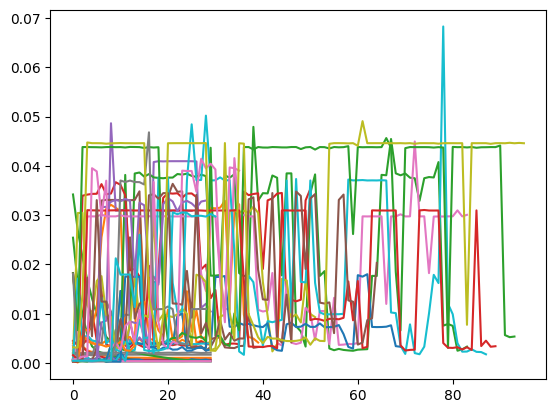

In [189]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skopt import gp_minimize
from skopt.space import Real, Integer

# Updated Model Definition to include number of neurons
class F_Predictor(nn.Module):
    def __init__(self, n_neurons=10):
        super(F_Predictor, self).__init__()
        self.layer = nn.Linear(8, n_neurons)  # Input features assumed to be 10
        self.output_layer = nn.Linear(n_neurons, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.layer(x))  # Use ReLU activation
        return self.output_layer(x)

# Objective function
def objective_function(params):
    lr, l2, batch_size, epochs, n_neurons = params
    return training(lr=lr, l2=l2, batch_size=int(batch_size), epochs=int(epochs), n_neurons=int(n_neurons))

# Training function
def training(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr=0.001, l2=0.001, batch_size=64, epochs=30, n_neurons=10):
    torch.manual_seed(0)
    losses = []
    x_train, y_train, x_test, y_test = map(torch.FloatTensor, (x_train.values, y_train.values, x_test.values, y_test.values))
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    model = F_Predictor(n_neurons=n_neurons)
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
    
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch == 0 or epoch % 2 == 0:
            print(loss)
        losses.append(loss.item())
    
    plt.plot(losses)
    model.eval()
    mse = mean_squared_error(model(x_test).detach().numpy(), y_test.detach().numpy())
    print('RMSE on test set: {}'.format(np.sqrt(mse)))
    return -mse  # Return negative MSE for minimization

# Partition the variables for VP-BO
def vpbo_optimization():
    space = [
        Real(1e-5, 1e-1, name='lr', prior='log-uniform'),
        Real(1e-6, 1e-2, name='l2', prior='log-uniform'),
        Integer(16, 128, name='batch_size'),
        Integer(10, 100, name='epochs'),
        Integer(10, 100, name='n_neurons')  # New hyperparameter for number of neurons
    ]

    # Partitions: e.g., Partition 1 (lr, l2), Partition 2 (batch_size, epochs, n_neurons)
    partitions = [(0, 1), (2, 3, 4)]

    # Initial hyperparameters
    x0 = [0.001, 0.001, 64, 30, 10]

    res = x0.copy()

    # Loop through the partitions and optimize each one separately
    for partition in partitions:
        def partial_objective(partial_params):
            # Fill in the parameters from the current partition
            full_params = res.copy()
            for idx, value in zip(partition, partial_params):
                full_params[idx] = value
            return objective_function(full_params)

        partial_space = [space[i] for i in partition]

        # Optimize the current partition
        result = gp_minimize(partial_objective, partial_space, n_calls=20, x0=[res[i] for i in partition])
        
        # Update the results with the best found values for this partition
        for idx, value in zip(partition, result.x):
            res[idx] = value
    
    return res

# Execute the optimization
best_hyperparams = vpbo_optimization()
print("Best Hyperparameters found: ", best_hyperparams)


In [ ]:
 Real(1e-5, 1e-1, name='lr', prior='log-uniform'),
        Real(1e-6, 1e-2, name='l2', prior='log-uniform'),
        Integer(16, 128, name='batch_size'),
        Integer(10, 100, name='epochs'),
        Integer(10, 100, name='n_neurons'

In [ ]:
0.1, 2.4333541172908522e-06, 42, 84, 33

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0298, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
tensor(0.0297, grad_fn=<MseLossBackward0>)
ten

-0.0402324

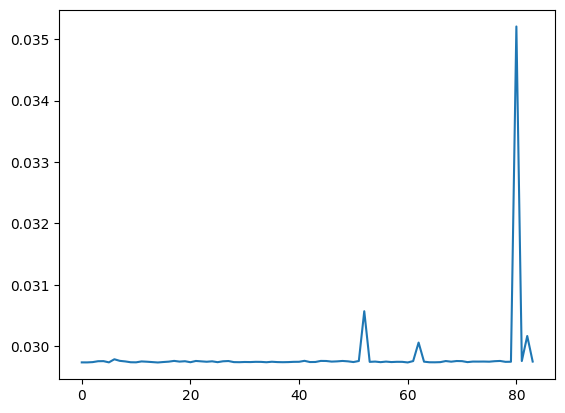

In [190]:
training(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test,lr=0.1,l2=2.4333541172908522e-06 ,batch_size=42,epochs=84, n_neurons=33)

In [308]:
import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict
import torch

from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

In [1]:
from skopt import gp_minimize


In [231]:
# Define Parameters
exp_w = 2.6
#C0varf = np.loadtxt('')
FR = np.array([0.100, 0.075, 0.075])
R_Frac = 1e-6
ub = np.array([423, 423])
lb = np.array([303, 303])
bounds = Bounds((0, 0), (1, 1))
dim = len(ub)
kernel = gpr.kernels.Matern((1, 1), ((0.06, 5), (0.06, 5)), nu = 2.5)

In [234]:
def normalize(x, axis = None, mu = None, sigma = None):
    if mu is None:
        mu = np.mean(x, axis = axis)
        sigma = np.std(x, axis = axis, ddof = 1)
        return (x-mu)/sigma, mu, sigma
    
    else:
        return (x-mu)/sigma


def unnormalize(x, mu, sigma):
    return sigma*x+mu

def descale(self, x):
    m = (ub-lb)/(bounds.ub-bounds.lb)
    b = ub-m*bounds.ub
    return m*x+b


def scale(x, use_self = True, lb = None, ub = None):
    if use_self:    
        m = (bounds.ub-bounds.lb)/(ub-lb)
        b = bounds.ub-m*ub
    else:
        m = (bounds.ub-bounds.lb)/(ub-lb)
        b = bounds.ub-m*ub
    return m*x+b

def LCB(x, model, dim, refmod = None,  args = ()):
    x = np.array([x]).reshape(-1,1);
    x = x.reshape(int(x.shape[0]/dim), dim)
    
    mu, std = model.predict(x, return_std=True);
    mu = mu.flatten()
    
    yref = refmod(descale(x), *args)
        
    return (yref+mu-exp_w*std).flatten()

In [ ]:
upper= max(df_scaled.max('target')

In [291]:
ub = np.ones((1,dim))
lb = np.zeros((1, dim))
bounds = Bounds(lb, ub)

In [288]:
lb

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [293]:
# Define Parameters
exp_w = 2.6
#C0varf = np.loadtxt('')
FR = np.array([0.100, 0.075, 0.075])
R_Frac = 1e-6
dim = len(ub)
kernel = gpr.kernels.Matern((1, 1), ((0.06, 5), (0.06, 5)), nu = 2.5)

In [292]:
bounds

Bounds(array([[0., 0.]]), array([[1., 1.]]))

optimvpbo
"""
        VP-BO approach...
        The partitions are made using the 'split_num' argument; this sets the number of blocks that the variables
        are split into. 
        The 'liminit' argument sets the initial value for the x_{-k} variables.
        Note that when introducing the design variables, x, they should be ordered by subsystem.
        For example if d = 4, and split_num = 2, introducing x = (x_a, x_b, x_c, x_d) will set
        x_1 = (x_a, x_b) and x_{-1}] = (x_c, x_d), and x_2 = (x_c, x_d) and x_{-2} = (x_a, x_b).
        The 'fcores' argument sets the number of cores used for parallel experimentation, and
        the 'afcores' argument sets the cores used for optimizing the AF
        """

In [326]:
import numpy as np

# Example parameters
i = 2
div = 3
x = np.zeros((5, 15))  # A 5x15 array initialized with zeros

# Assign random values to the specified slice
x[i, i*div:(i+1)*div] = np.random.uniform(0, 1, (1, div))

print(x)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.65804502 0.30619357 0.25132038 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


In [236]:
def optimvpbo(trials, split_num, liminit, scaling_factor, fcores, afcores, xinit  = None):
    print('Partitioned Variables BO Run...')
    start= time.time()
    trialspltvar = trials
    splitvar = split_num
    timespltvar= np.zeros(trialspltvar+1)
    timefspltvar = np.zeros(trialspltvar+1)
    div = int(dim/splitvar)
    sf = scaling_factor
    refmod = np.array([]).reshape(0, dim)

    x = liminit*np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy()+1e-6

        
    for i in range(splitvar):
        if xinit is None:
            x[i, i*div:(i+1)*div] = np.random.uniform(0, 1, (1, div))
        else:
            xinit = xinit().reshape(1, dim)
            x[i, i*div:(i+1)*div] = xinit[0, i*div:(i+1)*div]
        lwr[i, i*div:(i+1)*div] = 0
        upr[i, i*div:(i+1)*div] = sf
        x = np.vstack([x, liminit])
        splt = int(x.shape[0]/fcores)
        xbs = np.array(np.ones(fcores), dtype = tuple)


        if fcores == 1:
            xbs[0] = x
        else:
            for i in range(fcores-1):
                xbs[i] = x[i*splt:(i+1)*splt, :]
            xbs[-1] = x[(i+1)*splt:, :]

        startf = time.time()  
    y = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))((start_point)) for start_point in xbs)
    if str(type(refmod))=="<class '__main__.Network'>":
        yref = Parallel(n_jobs = fcores)(delayed(refmod)(start_point) for start_point in torch.from_numpy(x).float())
        endf = time.time()
        yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()      
    else:
        yref = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))((start_point)) for start_point in xbs)
        endf = time.time()
        yref = np.vstack(yref[:])
    timefspltvar[0] = endf-startf
    y = np.vstack(y[:])
    eps = y-yref
    ybst = np.min(y, axis = 0).reshape(-1, 1).T
    modelspltvar = {}
    bndsvar = {}
    LCB = {}
    xnxt = x.copy()
    init_pts = int(round(128**(div/dim)))
    x0 = np.random.uniform(0, sf, (init_pts, dim))


    for i in range(splitvar):
        modelspltvar[str(i+1)] = gpr.GaussianProcessRegressor(kernel, alpha = 1e-6,
                                                                  n_restarts_optimizer = 10,
                                                                  normalize_y = True)
        modelspltvar[str(i+1)].fit(x, eps[:, i])
        bndsvar[str(i+1)] = Bounds(lwr[i], upr[i])
        LCB[str(i+1)] = LCB(modelspltvar[str(i+1)], dim, exp_w,
                                   descale, **{'refmod': dist_ref['distrefmod'+str(i+1)]}).LCB
        opt = Parallel(n_jobs = afcores)(delayed(minimize)(LCB[str(i+1)], x0 = start_point,
                                                        method = 'L-BFGS-B',
                                                        bounds = bndsvar[str(i+1)])   
                                        for start_point in x0)   
        xnxts = np.array([res.x for res in opt], dtype = 'float')
        funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
        xnxt[i] = xnxts[np.argmin(funs)]
        xnxt[-1, i*div:(i+1)*div] = xnxts[np.argmin(funs), i*div:(i+1)*div]
    xnxtbs = np.array(np.ones(fcores), dtype = tuple)
    end = time.time()
    timespltvar[0] = end-start
    for i in range(trialspltvar):
        if fcores == 1:
            xnxtbs[0] = xnxt
        else:
            for j in range(fcores-1):
                xnxtbs[j] = xnxt[j*splt:(j+1)*splt, :]
            xnxtbs[-1] = xnxt[(j+1)*splt:, :]
        startf = time.time()
        ynxt = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))(descale(start_point)) for start_point in xnxtbs)
        if str(type(refmod))=="<class '__main__.Network'>":
            yref = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))(start_point) for start_point in torch.from_numpy(x).float())
            endf = time.time()
            yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()
        else:
            yref = Parallel(n_jobs = fcores)(delayed(math.sqrt(i**2))(descale(start_point)) for start_point in xnxtbs)
            endf = time.time()
            yref = np.vstack(yref[:])
        ynxt = np.vstack(ynxt[:])
        epsnxt = ynxt-yref
        timefspltvar[i+1] = timefspltvar[i]+(endf-startf)
        for j in range(splitvar):
            if any(ynxt[:, j] < min(y[:, j])):
                lwr[j] = xnxt[np.argmin(ynxt[:, j])]
                lwr[j, j*div:(j+1)*div] = 0
                upr[j] = xnxt[np.argmin(ynxt[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = sf
        x = np.vstack([x, xnxt])
        y = np.vstack([y, ynxt])
        eps = np.vstack([eps, epsnxt])
        ybst = np.vstack([ybst, np.min(ynxt, axis = 0).reshape(-1,1).T])
        x0 = np.random.uniform(0, sf, (init_pts, dim))
        for j in range(splitvar):
            modelspltvar[str(j+1)].fit(x, eps[:, j])
            bndsvar[str(j+1)] = Bounds(lwr[j], upr[j])
            opt = Parallel(n_jobs = afcores)(delayed(minimize)(LCB[str(j+1)], x0 = start_point,
                                                                method = 'L-BFGS-B',
                                                                bounds = bndsvar[str(j+1)])
                                            for start_point in x0)
            xnxts = np.array([res.x for res in opt], dtype = 'float')
            funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
            xnxt[j] = xnxts[np.argmin(funs)]
            xnxt[-1, j*div:(j+1)*div] = xnxts[np.argmin(funs), j*div:(j+1)*div]
        end = time.time()
        timespltvar[i+1] = end-start
    spltvar_optim = True
    modelspltvar = modelspltvar
    xspltvar = descale(x)
    yspltvar = y
    yspltvarbst = ybst

In [238]:
from joblib import Parallel, delayed
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the neural network model (F_Predictor needs to be defined separately)
class F_Predictor(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(F_Predictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the training function
def training(x_train, y_train, x_test, y_test, lr, l2, batch_size, epochs, neurons):
    torch.manual_seed(0)
    losses = []
    x_train, y_train, x_test, y_test = map(
    torch.FloatTensor, (x_train.values, y_train.values, x_test.values, y_test.values)
    )
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

    train_ds = TensorDataset(x_train, y_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size)
    
    # Initialize the model with the specified number of neurons
    model = F_Predictor(input_dim=x_train.shape[1], hidden_dim=neurons)
    
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
    
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        if epoch == 0 or epoch % 2 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
        losses.append(loss.item())
    
    # Plot the training loss
    plt.plot(losses)
    plt.title(f'Loss Curve (lr={lr}, l2={l2}, neurons={neurons})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        mse = mean_squared_error(model(x_test).numpy(), y_test.numpy())
    rmse = np.sqrt(mse)
    print(f'RMSE on test set: {rmse}')
    
    return rmse  # Minimize RMSE during optimization

# Hyperparameter optimization using Parallel
def parallel_vpbo(x_train, y_train, x_test, y_test, trials=10, fcores=4):
    # Define the search space
    lr_range = [0.001, 0.01, 0.1]
    l2_range = [0.001, 0.01]
    batch_size_range = [32, 64, 128]
    epochs_range = [30, 50]
    neurons_range = [32, 64, 128]

    # List of all hyperparameter combinations
    param_combinations = [(lr, l2, batch_size, epochs, neurons)
                          for lr in lr_range
                          for l2 in l2_range
                          for batch_size in batch_size_range
                          for epochs in epochs_range
                          for neurons in neurons_range]

    # Function to run one trial
    def run_trial(params):
        lr, l2, batch_size, epochs, neurons = params
        return training(x_train, y_train, x_test, y_test, lr, l2, batch_size, epochs, neurons)

    # Run trials in parallel
    results = Parallel(n_jobs=fcores)(delayed(run_trial)(params) for params in param_combinations[:trials])

    # Find the best result
    best_rmse = min(results)
    best_params = param_combinations[results.index(best_rmse)]

    print(f'Best RMSE: {best_rmse}')
    print(f'Best Hyperparameters: {best_params}')

    return best_params, best_rmse

# Example usage
# Ensure x_train, y_train, x_test, y_test are defined and preprocessed
best_params, best_rmse = parallel_vpbo(X_train, y_train, X_test, y_test)


NameError: name 'X_train' is not defined

In [325]:
training(x_train, y_train, x_test, y_test, lr= 0.001, l2=0.001, batch_size=32, epochs=84, neurons=64)

torch.Size([131318, 8]) torch.Size([131318, 1]) torch.Size([32830, 8]) torch.Size([32830, 1])
Epoch 0, Loss: 0.00026037151110358536
Epoch 2, Loss: 0.0002636632416397333
Epoch 4, Loss: 0.0002711877750698477
Epoch 6, Loss: 0.0002726299862843007
Epoch 8, Loss: 0.0002740581694524735
Epoch 10, Loss: 0.0002787254343274981
Epoch 12, Loss: 0.0002834406041074544
Epoch 14, Loss: 0.00028546492103487253
Epoch 16, Loss: 0.0002864048001356423
Epoch 18, Loss: 0.00028930522967129946
Epoch 20, Loss: 0.00029066865681670606
Epoch 22, Loss: 0.0002958805998787284
Epoch 24, Loss: 0.000293007557047531
Epoch 26, Loss: 0.0002929173060692847
Epoch 28, Loss: 0.00028723885770887136
Epoch 30, Loss: 0.0002912341442424804
Epoch 32, Loss: 0.0002922802232205868
Epoch 34, Loss: 0.00029274055850692093
Epoch 36, Loss: 0.0002931477501988411
Epoch 38, Loss: 0.00029813029686920345
Epoch 40, Loss: 0.0003020959557034075
Epoch 42, Loss: 0.0003045365447178483
Epoch 44, Loss: 0.00030018604593351483
Epoch 46, Loss: 0.000299988634

KeyboardInterrupt: 

In [2]:
x_train

NameError: name 'x_train' is not defined

In [3]:
# Corrected optimvpbo function
def optimvpbo(trials, split_num, liminit, scaling_factor, fcores, afcores, xinit=None):
    print('Partitioned Variables BO Run...')
    start = time.time()
    trialspltvar = trials
    splitvar = split_num
    timespltvar = np.zeros(trialspltvar + 1)
    timefspltvar = np.zeros(trialspltvar + 1)
    dim = 8  # Example dimension; adjust according to your data
    div = int(dim / splitvar)
    sf = scaling_factor
    refmod = np.array([]).reshape(0, dim)

    x = liminit * np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy() + 1e-6

    for i in range(splitvar):
        if xinit is None:
            x[i, i*div:(i+1)*div] = np.random.uniform(0, 1, (1, div))
        else:
            xinit = xinit.reshape(1, dim)
            x[i, i*div:(i+1)*div] = xinit[0, i*div:(i+1)*div]
        lwr[i, i*div:(i+1)*div] = 0
        upr[i, i*div:(i+1)*div] = sf
        x = np.vstack([x, np.full((1, dim), liminit)])

        splt = int(x.shape[0] / fcores)
        xbs = np.array(np.ones(fcores), dtype=tuple)

        if fcores == 1:
            xbs[0] = x
        else:
            for i in range(fcores - 1):
                xbs[i] = x[i * splt:(i + 1) * splt, :]
            xbs[-1] = x[(i + 1) * splt:, :]

        startf = time.time()

        # Corrected line using delayed properly
        y = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(sp**2)))(start_point) for start_point in xbs)

        if str(type(refmod)) == "<class '__main__.Network'>":
            yref = Parallel(n_jobs=fcores)(delayed(refmod)(start_point) for start_point in torch.from_numpy(x).float())
            endf = time.time()
            yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()
        else:
            yref = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(sp**2)))(start_point) for start_point in xbs)
            endf = time.time()
            yref = np.vstack(yref[:])
        timefspltvar[0] = endf - startf
        y = np.vstack(y[:])
        eps = y - yref
        ybst = np.min(y, axis=0).reshape(-1, 1).T
        modelspltvar = {}
        bndsvar = {}
        LCB = {}
        xnxt = x.copy()
        init_pts = int(round(128**(div / dim)))
        x0 = np.random.uniform(0, sf, (init_pts, dim))

        for i in range(splitvar):
            modelspltvar[str(i+1)] = gp_minimize
            bndsvar[str(i+1)] = Bounds(lwr[i], upr[i])
            LCB[str(i+1)] = LCB(modelspltvar[str(i+1)], dim, exp_w,
                                   descale, **{'refmod': dist_ref['distrefmod'+str(i+1)]}).LCB
            opt = Parallel(n_jobs = afcores)(delayed(minimize)(LCB[str(i+1)], x0 = start_point,
                                                        method = 'L-BFGS-B',
                                                        bounds = bndsvar[str(i+1)])   
                                        for start_point in x0) 
               
            xnxts = np.array([res.x for res in opt], dtype='float')
            funs = np.array([np.atleast_1d(res.fun)[0] for res in opt])
            xnxt[i] = xnxts[np.argmin(funs)]
            xnxt[-1, i*div:(i+1)*div] = xnxts[np.argmin(funs), i*div:(i+1)*div]
        xnxtbs = np.array(np.ones(fcores), dtype=tuple)
        end = time.time()
        timespltvar[0] = end - start
        for i in range(trialspltvar):
            if fcores == 1:
                xnxtbs[0] = xnxt
            else:
                for j in range(fcores - 1):
                    xnxtbs[j] = xnxt[j * splt:(j + 1) * splt, :]
                xnxtbs[-1] = xnxt[(j + 1) * splt:, :]
            startf = time.time()
            ynxt = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(descale(sp)**2)))(start_point) for start_point in xnxtbs)
            if str(type(refmod)) == "<class '__main__.Network'>":
                yref = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(sp**2)))(start_point) for start_point in torch.from_numpy(x).float())
                endf = time.time()
                yref = torch.hstack(yref[:]).T.reshape(-1, 1).data.numpy()
            else:
                yref = Parallel(n_jobs=fcores)(delayed(lambda sp: math.sqrt(np.sum(descale(sp)**2)))(start_point) for start_point in xnxtbs)
                endf = time.time()
                yref = np.vstack(yref[:])
            ynxt = np.vstack(ynxt[:])
            epsnxt = ynxt - yref
            timefspltvar[i + 1] = timefspltvar[i] + (endf - startf)
            for j in range(splitvar):
                if any(ynxt[:, j] < min(y[:, j])):
                    lwr[j] = xnxt[np.argmin(ynxt[:, j])]
                    lwr[j, j * div:(j + 1) * div] = 0
                    upr[j] = xnxt[np.argmin(ynxt[:, j])] + 1e-6
                    upr[j, j * div:(j + 1) * div] = sf
        x = np.vstack([x, xnxt])
        y = np.vstack([y, ynxt])
        eps = np.vstack([eps, epsnxt])

    return y, timespltvar, timefspltvar

In [ ]:
'''
def para(trials_num, split_features, ):
     print('Partitioned Variables BO Run...')
     start= time.time()
     trials_num = trials_num
     split_features= split_features

'''

In [ ]:
## VP-BO 
for i, a_0 in enumerate(x_train):
    start = time.time()
    optimvpbo(trials = 2,
                             split_num = 2,
                             liminit = 4,
                             scaling_factor=2,
                             fcores = 3,
                             afcores = 1,
                             #refcores = 1,
                             xinit  = None)
    end = time.time()
    print('Run time '+str(end-start)+'s')
    print('iteration '+str(i+1))

Partitioned Variables BO Run...


NameError: name 'dist_ref' is not defined

In [ ]:
df_corr[non_numeric_columns] = df_corr[non_numeric_columns].astype(float)

In [ ]:
cleaned_data.columns

Index(['hotRunner', 'hotRunnerCost', 'manufacturingCost',
       'mouldValidationCost', 'designTime', 'hourlyDesignCost',
       'removedChassis', 'removedCavity', 'numberOfCavities', 'Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosystem quality - terrestrial acidification & nutrification',
       'resources - total', 'human health - ionising radiation',
       'human health - respiratory effects (inorganics)',
       'human health - total', 'human health - human toxicity',
       'ecosystem quality - aquatic ecotoxicity',
       'climate change - climate change',
       'human health - ozone layer depletion',
       'ecosystem quality - land occupation', 'climate change - total',
       'ecosystem quality - total'],
      dtype='object')

In [177]:
import pandas
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# import the necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn import metrics

# use month, mintemp, and meantemp to predict max temp

# split into train and test data
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# run linear regression and make predictions
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)

# what is line of best fit
print("intercept (m): ", model.intercept_)
print("coef (b) of each independent variable: ", model.coef_)
print("RScore. (r) ", model.score(X_test,y_test))

# how close is our regression?
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print("r2 score")
pred_train = lin_reg.predict(X_train)
print("Train set:", metrics.r2_score(y_train, lin_reg.predict(X_train)))
pred_test = lin_reg.predict(X_test)
print("Test set:", metrics.r2_score(y_test, predictions))

intercept (m):  [0.33580905]
coef (b) of each independent variable:  [[ 1.47217664e-03  1.09199797e-03 -7.50890897e-05 -1.25874933e-03
   2.69687891e-05 -1.73216461e-04  4.29331260e-03 -2.61367468e-04]]
RScore. (r)  2.3758634905890474e-05
MAE: 0.16174673735647382
r2 score
Train set: 5.0013864723919e-05
Test set: 2.3758634905890474e-05


In [ ]:
from typing import Tuple, List

In [ ]:
from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS


In [ ]:
pip install tensorflow.python scikeras scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.python (from versions: none)
ERROR: No matching distribution found for tensorflow.python


In [332]:
def vpbo_loop(trials, split_num, liminit, fcores=1, afcores=1, refcores=1, x_init=x): 
    mll = {}
    gp = {}
    acq_fun = {}

# Simulate BO
    for i in range(splitvar):
        # 1. Create a new GP with the best setup 
        gp[str(i+1)], mll[str(i+1)] = get_gp(
            X_train,
            y_train,
            ConstantMean(),
            ScaleKernel(RBFKernel()),
            GaussianLikelihood()
        )
        
        mll[str(i+1)] = fit_gpytorch_mll(mll)
        bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
        # 2. Define and optimize an acquisition function
        acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)], 
                                                best_f=torch.min(y_train))


        for j in range(splitvar):
            opt = Parallel(n_jobs = af_cores)(delayed(optimize_acqf(
                                                                    acq_fun[str(j+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )          
                                                        )
                                                    for x_0 in x0)
            
            X_test_new = np.array([res.x for res in opt], dtype = 'float')
            acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])
            X_test_new[j] = X_test_new[np.argmin(acqf_val)]
            X_test_new[-1, j*div:(j+1)*div] = X_test_new[np.argmin(acqf_val), j*div:(j+1)*div]

        if f_cores == 1:
                X_test_best[0] = X_test_new
        else:
                for j in range(f_cores-1):
                    X_test_best[j] = X_test_new[j*splt:(j+1)*splt, :]
                X_test_best[-1] = X_test[(j+1)*splt:, :]


        
        y_test_new = Parallel(n_jobs = f_cores)(delayed(self.distmod)(descale(x_s), *self.args)
                                             for x_s in x_nxtbs)



        

        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))
        y_test_new= torch.vstack((y_test_new[:]))
        eps_next = y_test_new-y_test
        eps = torch.vstack([eps, eps_next])
        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])
        
        for j in range(splitvar):
             if any(y_test_new[:,j] < min(y[:,j])):
                lwr[j] = X_test_new[np.argmin(y_test_new[:, j])]
                lwr[j, j*div:(j+1)*div] = bounds.lb[j]
                upr[j] = X_test_new[np.argmin(y_test_new[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = bounds.ub[j]  

        for j in range(splitvar):
            mll[str(i+1)] = fit_gpytorch_mll(mll)
            acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)], 
                                                best_f=torch.min(y_train))
            [str(j+1)].fit(x, eps[:, j])
            bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])          
        end =time.time()
        time_vp[i+init_pts] = end-start

        print('ITERATION COUNT IS AT 'f'{init_pts+i+1};\
                  TOTAL ELAPSED TIME: 'f'{time_vp[i+init_pts]:.1f}')
        
    vpbo_optim = True
    model_vp = gp
    x_vp = descale(x)
    y_vp = y
    y_vpbst = y_best

In [333]:
vpbo_loop(trials=10, split_num=2, liminit=np, fcores=1, afcores=1, refcores=1, x_init=x)

SyntaxError: positional argument follows keyword argument (2673899882.py, line 1)

In [ ]:
pip install tensorflow-text==2.13.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-text==2.13.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-text==2.13.0


In [ ]:
'''
from keras.layers import Dense, Dropout
from numpy import sqrt
from numpy import argmax
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import time
import os
from sklearn.model_selection import train_test_split

from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,roc_curve, classification_report, f1_score, roc_auc_score,accuracy_score, recall_score, precision_score,log_loss, make_scorer, cohen_kappa_score,fbeta_score,matthews_corrcoef,recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

import math
import ast

from sklearn.metrics import auc

#for RadomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# random seed
from random_seeds import reset_seeds

# Percentile bootstrap
from bootstrapmetric_diabetes import bootstrap_metric
# from bca import bootstrap_metric

# for HyperOpt TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from hyperopt.early_stop import no_progress_loss
import sys
import yaml
import argparse
from datetime import datetime
import keras.backend as K
'''

In [201]:
for i, x_0 in enumerate(x_train):
    start = time.time()
    optimizer_vpbo(trials = trials_par2,
                             split_num = 2,
                             lim_init = lim_init,
                             f_cores = 3,
                             af_cores = 1,
                             ref_cores = 1,
                             x_init  = x_0)
    end = time.time()
    print('Run time '+str(end-start)+'s')
    print('iteration '+str(i+1))
    MET_VPBO1[:, 0] += time_vp.flatten()
    MET_VPBO1[:, 1] += time_fvp.flatten()
    MET_VPBO1[:, 2] += y_vpbst[:, -1].flatten()
    MET_VPBO1[:, 3] += np.min(y_vpbst[:, -1])
    print('Best VP-BO value is '+str(np.min(y_vpbst[:, -1])))
    PARAMS_VPBO1[i] = REACOPTIM.x_vp[np.argmin(y_vp[:, -1])]
    DIST_VPBO1 = np.vstack([DIST_VPBO1, Rx_vp])
    RES_VPBO1[:, i] = REACOPTIM.y_vpbst[:, -1]
MET_VPBO1[:, 0] = MET_VPBO1[:, 0]/(i+1)
MET_VPBO1[:, 1] = MET_VPBO1[:, 1]/(i+1)
MET_VPBO1[:, 2] = MET_VPBO1[:, 2]/(i+1)
MET_VPBO1[:, 3] = MET_VPBO1[:, 3]/(i+1)
REACOPTIM.y_vpbst = MET_VPBO1[:, 2].reshape(-1, 1)
REACOPTIM.time_vp = MET_VPBO1[:, 0].flatten()
REACOPTIM.time_fvp = MET_VPBO1[:, 1].flatten()

NameError: name 'x_init' is not defined

 """
        > split_number is the number of splits the input space is being separated into
        
        > lim_init is the initial point that is being used to sample (minimum of the reference model)
          and these serve as the value limits along the axes that are NOT being optimized
          in each respective partition; it is updated as the algorithm progresses
          
        > lim_init should be the same size as x and it can be randomly selected if not available
        
        > f_cores and af_cores are the cores used for sampling f and optimizing the AF
        
        > if reference model is not available, make them functions that return 0
         
        > x_i

In [199]:
optimizer_vpbo(self, trials=10, split_num=1, lim_init=0,
                         f_cores = 2, af_cores = 2, ref_cores = 1, x_init  = None)

NameError: name 'self' is not defined

In [179]:
data= df_scaled

In [180]:
import pandas as pd
import numpy as np
import dcor

def filtered_correlations(df: pd.DataFrame, target_variable: str, threshold: float = 0.1) -> pd.Series:
    """Calculates and filters distance correlations for a specific target variable.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        target_variable (str): The name of the target variable (column) in the DataFrame.
        threshold (float): Minimum absolute correlation value to filter by.

    Returns:
        pd.Series: A series containing distance correlations with the target variable,
                   sorted by absolute value in descending order.
    
    # Ensure target variable is in the DataFrame
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in DataFrame.")
"""
    # Calculate distance correlations for each column with the target variable
    distance_correlations = {}
    target_data = df[target_variable].values

    for column in df.columns:
        if column != target_variable and column != label_col:  # Exclude the target variable itself
            feature_data = df[column].values
            # Calculate distance correlation
            dist_corr = dcor.distance_correlation(feature_data, target_data)
            distance_correlations[column] = dist_corr

    # Convert dictionary to pandas Series
    distance_correlations_series = pd.Series(distance_correlations)

    # Filter for correlations above the threshold
    filtered_correlations = distance_correlations_series[abs(distance_correlations_series) > threshold]

    # Sort by absolute value in descending order
    filtered_correlations = filtered_correlations.sort_values(key=abs, ascending=False)

    return filtered_correlations

# Example usage
# Assuming df is your pandas DataFrame and 'target' is the name of your target column
# filtered_corrs = filtered_correlations(df, 'target')
# print(filtered_corrs)


In [189]:
target.head()

,Cost,resources - total,human health - total,ecosystem quality - total
0,0.201290,0.000318,0.001123,0.003202
1,0.038710,0.000030,0.000054,0.000038
2,0.806452,0.000317,0.001119,0.003192
3,0.058065,0.000192,0.000675,0.001926
4,0.349677,0.000190,0.000671,0.001915


In [192]:
feature_cols= input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

label_col= output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost'
                      ]

In [191]:
feature_cols= input_variables
label_col = target

In [226]:
data= df_scaled

In [227]:
df_x = data[feature_cols]
df_y = data[label_col]

In [195]:
import torch
from typing import Tuple, List
import pandas as pd
import gpytorch
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.models import SingleTaskGP

# Custom function that creates a GP and mll object from data and model settings
def get_gp(
    X: torch.Tensor,
    y: torch.Tensor,
    mean_module: gpytorch.means.Mean,
    covar_module: gpytorch.kernels.Kernel,
    likelihood: gpytorch.likelihoods.Likelihood
) -> Tuple[
    gpytorch.models.GP,
    gpytorch.mlls.MarginalLogLikelihood
]:
    gp = SingleTaskGP(
        X, y,
        mean_module=mean_module,
        covar_module=covar_module,
        likelihood=likelihood
    )
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    return gp, mll

In [ ]:
'''
import pandas as pd # import pandas


sepa=filtered_correlations(data, label_col[0]).index.intersection(input_variables)


filtered_correlations

# Initialize train/test data
test_data = 2000

data = data.sample(frac=1.)

X = data[feature_cols].to_numpy()
y = data[label_col].to_numpy()

X_train = torch.from_numpy(X[:-test_data])
y_train = torch.from_numpy(y[:-test_data])

X_test = torch.from_numpy(X[-test_data:])
y_test = torch.from_numpy(y[-test_data:])

print(f"Train set: {X_train.shape}")
print(f"X-Test set: {X_test.shape}")
print(f"Y-Test set: {y_test.shape}")
'''

In [222]:
from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

ub = np.zeros(data[feature_cols].shape[1])
lb = np.ones(data[feature_cols].shape[1])

bounds = torch.tensor([
    [(ub)], [(lb)]
    ])

ineq_constraint = [(torch.tensor([0, 1], dtype=torch.long), torch.tensor([1, -1], dtype=torch.float), 0.1)]


dim = len(ub)
dim

fcores, splitvar = 4, 4
splitvar

from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel, MaternKernel
from gpytorch.likelihoods import GaussianLikelihood

from botorch.fit import fit_gpytorch_mll
from botorch.cross_validation import gen_loo_cv_folds

# Build CV folds
#cv_fold = gen_loo_cv_folds(X_train, y_train)

import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict


df_x = data[feature_cols]
df_y = data[label_col]



splt= int(df_x.shape[0]/fcores)
splt

limitinit = np.zeros((splitvar, dim))

x = limitinit*np.ones((splitvar, dim))

Xbs= np.array(np.ones(fcores), dtype = tuple) 
Xbs

x= np.ones((splitvar, dim))
x

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.]])

In [229]:
data.head()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,0.5,1.0,1.0,0.5,0.0,0.0,1.0,0.666667,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201290,0.000700,0.003496,0.011801,0.000316,0.000834,0.000318,0.000524,0.001147,0.001123,0.003098,0.001833,0.000650,0.000886,0.002312,0.000650,0.003202
1,0.5,1.0,1.0,0.0,0.5,0.5,0.0,0.000000,0.0,0.0,1.0,0.483871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038710,0.000008,0.000037,0.000091,0.000030,0.000037,0.000030,0.000075,0.000045,0.000054,0.000039,0.000029,0.000032,0.000043,0.000055,0.000032,0.000038
2,0.5,0.0,1.0,0.5,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.806452,0.000698,0.003484,0.011761,0.000315,0.000831,0.000317,0.000522,0.001143,0.001119,0.003088,0.001827,0.000647,0.000883,0.002304,0.000647,0.003192
3,0.5,1.0,0.0,0.0,1.0,0.5,0.0,0.400000,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058065,0.000421,0.002102,0.007096,0.000190,0.000501,0.000192,0.000315,0.000690,0.000675,0.001863,0.001102,0.000391,0.000533,0.001390,0.000391,0.001926
4,0.5,0.0,0.5,0.0,0.5,0.0,1.0,0.400000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206349,0.0,0.0,0.0,0.0,0.0,0.0,0.375,0.5,0.0,0.0,0.0,0.571429,0.294118,0.285714,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349677,0.000419,0.002090,0.007057,0.000189,0.000498,0.000190,0.000313,0.000686,0.000671,0.001853,0.001096,0.000388,0.000530,0.001382,0.000388,0.001915


In [235]:
vpbo_loop1(trials=10, split_num=4, liminit=limitinit, fcores=1, afcores=1, refcores=1, data=data, test_data=10)


SystemError: CPUDispatcher(<function _generate_distance_covariance_sqr_terms_avl_impl.<locals>._distance_covariance_sqr_terms_avl_impl at 0x00000224D0125440>) returned a result with an exception set

In [233]:
import numpy as np

from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf

from scipy.spatial.distance import euclidean
def vpbo_loop1(trials, split_num, liminit, fcores, afcores, refcores, data, test_data):
    trialspltvar = trials #epochs actually
    splitvar = split_num  #number of splits the data will be in. In our case, four splits

    div = int(dim/splitvar)    #dim is total number of features
    #sf = scaling_factor
    x0 = np.random.uniform(splitvar, dim)

    x = liminit*np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy()+1e-6
    mll = {}
    gp = {}
    acq_fun = {}
    bnds_var = {}
# Simulate BO
    for i in range(splitvar):
        if fcores == 1:
                Xbs[0] = x
        else:
                for i in range(fcores-1):
                    Xbs[i] = x[i*splt:(i+1)*splt, :]
                Xbs[-1] = x[(i+1)*splt:, :]
        
        feature_cols=filtered_correlations(data, label_col[i+1]).index.intersection(input_variables)
        # Initialize train/test data
        test_data = test_data

        #data = data.sample(frac=1.)

        X = data[feature_cols].to_numpy()
        y = data[label_col[i+1]].to_numpy()

        X_train = torch.from_numpy(X[:-test_data])
        y_train = torch.from_numpy(y[:-test_data])

        X_test = torch.from_numpy(X[-test_data:])
        y_test = torch.from_numpy(y[-test_data:])
        # Add an extra dimension to Y_train and Y_test
        #y_train = y_train.unsqueeze(1)  # Shape: [13059, 1]
        #y_test = y_test.unsqueeze(1)    # Shape: [2000, 1]

        print(f"X-Train set: {X_train.shape}")
        print(f"Y-Train set: {y_train.shape}")
        print(f"X-Test set: {X_test.shape}")
        print(f"Y-Test set: {y_test.shape}")
       

        
        # 1. Create a new GP with the best setup
        gp[str(i+1)], mll[str(i+1)] = get_gp(
            X_train,
            y_train,
            ConstantMean(),
            ScaleKernel(RBFKernel()),
            GaussianLikelihood()
        )

        mll[str(i+1)] = fit_gpytorch_mll(mll[str(i+1)])
        bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
        # 2. Define and optimize an acquisition function
        acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)],
                                                best_f=torch.min(y_train))

        X_new, acqf_val  = Parallel(n_jobs = afcores)(delayed(optimize_acqf(
                                                                    acq_fun[str(i+1)],
                                                                    bounds=bounds,
                                                                    q=1, 
                                                                    num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for x_0 in x0)
        
        X_new = torch.round(X_new, decimals=1)

          # 3.a (Optional) Find the closes test point
        best_idx = -1
        best_dist = np.inf
        for idx, test_point in enumerate(X_test):
            cur_dist = euclidean(X_new.squeeze(), test_point)
            if cur_dist < best_dist:
                best_dist = cur_dist
                best_idx = idx

        # 3.b Update the dataset by adding the new point
        X_test_new = X_test[best_idx]
        y_test_new = y_test[best_idx]

        # Remove from test set    
        # Remove from test set
        X_test = torch.cat((X_test[:best_idx], X_test[best_idx + 1:]))
        y_test = torch.cat((y_test[:best_idx], y_test[best_idx + 1:]))

        print(f"Round: {i}")
        print(f" - New experimental point: {X_new}")
        print(f" - New acquisition value: {acqf_val}")
        print(f" - Test point: {X_test_new}")
        print(f" - Test evaluation: {y_test_new}")
        print(F" - Dataset shape: {X_train.shape[0]}")
        print("")

        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))

        '''
          X_test_new = np.array([res.x for res in opt], dtype = 'float')
          acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])
          X_test_new[i] = X_test_new[np.argmin(acqf_val)]
          X_test_new[-1, i*div:(i+1)*div] = X_test_new[np.argmin(acqf_val), i*div:(i+1)*div]

          X_new_best = np.array(np.ones(fcores), dtype = tuple)
'''

        for j in range(splitvar):
             if any(y_test_new[:,j] < min(y[:,j])):
                lwr[j] = X_test_new[np.argmin(y_test_new[:, j])]
                lwr[j, j*div:(j+1)*div] = bounds.lb[j]
                upr[j] = X_test_new[np.argmin(y_test_new[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = bounds.ub[j]

        for j in range(splitvar):
            mll[str(j+1)] = fit_gpytorch_mll(mll[str(j+1)])
            bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])
            acq_fun[str(j+1)] = ExpectedImprovement(model=gp[str(j+1)],
                                                best_f=torch.min(y_train))
            [str(j+1)].fit(x, eps[:, j])
            X_test_new, acqf_val = Parallel(n_jobs = af_cores)(delayed(optimize_acqf(
                                                                    acq_fun[str(j+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for start_point in x0)

            '''X_test_new = np.array([res.x for res in opt], dtype = 'float')
            acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])'''
            X_test_new[j] = X_test_new[np.argmin(acqf_val)]
            X_test_new[-1, j*div:(j+1)*div] = X_test_new[np.argmin(acqf_val), j*div:(j+1)*div]





'''
        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))
        y_test_new= torch.vstack((y_test_new[:]))
        eps_next = y_test_new-y_test
        eps = torch.vstack([eps, eps_next])
        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])
'''




'\n        X_train = torch.vstack((X_train, X_test_new))\n        y_train = torch.vstack((y_train, y_test_new))\n        y_test_new= torch.vstack((y_test_new[:]))\n        eps_next = y_test_new-y_test\n        eps = torch.vstack([eps, eps_next])\n        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])\n'

In [ ]:
data.shape

import pandas as pd
import numpy as np
import dcor

def filtered_correlations(df: pd.DataFrame, target_variable: str, threshold: float = 0.1) -> pd.Series:
    """Calculates and filters distance correlations for a specific target variable.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        target_variable (str): The name of the target variable (column) in the DataFrame.
        threshold (float): Minimum absolute correlation value to filter by.

    Returns:
        pd.Series: A series containing distance correlations with the target variable,
                   sorted by absolute value in descending order.
    
    # Ensure target variable is in the DataFrame
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in DataFrame.")
"""
    # Calculate distance correlations for each column with the target variable
    distance_correlations = {}
    target_data = df[target_variable].values

    for column in df.columns:
        if column != target_variable and column != label_col:  # Exclude the target variable itself
            feature_data = df[column].values
            # Calculate distance correlation
            dist_corr = dcor.distance_correlation(feature_data, target_data)
            distance_correlations[column] = dist_corr

    # Convert dictionary to pandas Series
    distance_correlations_series = pd.Series(distance_correlations)

    # Filter for correlations above the threshold
    filtered_correlations = distance_correlations_series[abs(distance_correlations_series) > threshold]

    # Sort by absolute value in descending order
    filtered_correlations = filtered_correlations.sort_values(key=abs, ascending=False)

    return filtered_correlations

# Example usage
# Assuming df is your pandas DataFrame and 'target' is the name of your target column
# filtered_corrs = filtered_correlations(df, 'target')
# print(filtered_corrs)


df_x = data[feature_cols]
df_y = data[label_col]

label_col[0]

import pandas as pd # import pandas


sepa=filtered_correlations(data, label_col[0]).index.intersection(input_variables)


filtered_correlations

# Initialize train/test data
test_data = 2000

data = data.sample(frac=1.)

X = data[feature_cols].to_numpy()
y = data[label_col].to_numpy()

X_train = torch.from_numpy(X[:-test_data])
y_train = torch.from_numpy(y[:-test_data])

X_test = torch.from_numpy(X[-test_data:])
y_test = torch.from_numpy(y[-test_data:])

print(f"Train set: {X_train.shape}")
print(f"X-Test set: {X_test.shape}")
print(f"Y-Test set: {y_test.shape}")

from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel, MaternKernel
from gpytorch.likelihoods import GaussianLikelihood

from botorch.fit import fit_gpytorch_mll
from botorch.cross_validation import gen_loo_cv_folds

# Build CV folds
#cv_fold = gen_loo_cv_folds(X_train, y_train)

import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict
import torch

from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

ub = np.zeros(data[feature_cols].shape[1])
lb = np.ones(data[feature_cols].shape[1])

bounds = torch.tensor([
    [(ub)], [(lb)]
    ])

ineq_constraint = [(torch.tensor([0, 1], dtype=torch.long), torch.tensor([1, -1], dtype=torch.float), 0.1)]

ub = np.zeros(data[feature_cols].shape[1])
lb = np.ones(data[feature_cols].shape[1])

dim = len(ub)
dim

fcores, splitvar = 4, 4
splitvar

df_x = data[feature_cols]
df_y = data[label_col]

df_x.shape[]

splt= int(df_x.shape[0]/fcores)
splt

limitinit = np.zeros((splitvar, dim))

x = limitinit*np.ones((splitvar, dim))

Xbs= np.array(np.ones(fcores), dtype = tuple) 
Xbs

x= np.ones((splitvar, dim))
x

for i in range(splitvar):
    if fcores == 1:
            Xbs[0] = x
    else:
            for i in range(fcores-1):
                Xbs[i] = x[i*splt:(i+1)*splt, :]
            Xbs[-1] = x[(i+1)*splt:, :]

vpbo_loop1(trials=10, split_num=4, liminit=limitinit, fcores=4, afcores=1, refcores=1, data=data, test_data=2000)

def vpbo_loop1(trials, split_num, liminit, fcores, afcores, refcores, data, test_data):
    trialspltvar = trials #epochs actually
    splitvar = split_num  #number of splits the data will be in. In our case, four splits

    div = int(dim/splitvar)    #dim is total number of features
    #sf = scaling_factor
    x0 = np.random.uniform(splitvar, dim)

    x = liminit*np.ones((splitvar, dim))
    lwr = x.copy()
    upr = x.copy()+1e-6
    mll = {}
    gp = {}
    acq_fun = {}
    bnds_var = {}
# Simulate BO
    for i in range(splitvar):
        if fcores == 1:
                Xbs[0] = x
        else:
                for i in range(fcores-1):
                    Xbs[i] = x[i*splt:(i+1)*splt, :]
                Xbs[-1] = x[(i+1)*splt:, :]
        
        feature_cols=filtered_correlations(data, label_col[i+1]).index.intersection(input_variables)
        # Initialize train/test data
        test_data = test_data

        #data = data.sample(frac=1.)

        X = data[feature_cols].to_numpy()
        y = data[label_col[i+1]].to_numpy()

        X_train = torch.from_numpy(X[:-test_data])
        y_train = torch.from_numpy(y[:-test_data])

        X_test = torch.from_numpy(X[-test_data:])
        y_test = torch.from_numpy(y[-test_data:])
        # Add an extra dimension to Y_train and Y_test
        y_train = y_train.unsqueeze(1)  # Shape: [13059, 1]
        y_test = y_test.unsqueeze(1)    # Shape: [2000, 1]

        print(f"X-Train set: {X_train.shape}")
        print(f"Y-Train set: {y_train.shape}")
        print(f"X-Test set: {X_test.shape}")
        print(f"Y-Test set: {y_test.shape}")
       

        
        # 1. Create a new GP with the best setup
        gp[str(i+1)], mll[str(i+1)] = get_gp(
            X_train,
            y_train,
            ConstantMean(),
            ScaleKernel(RBFKernel()),
            GaussianLikelihood()
        )

        mll[str(i+1)] = fit_gpytorch_mll(mll[str(i+1)])
        bnds_var[str(i+1)] = Bounds(lwr[i], upr[i])
        # 2. Define and optimize an acquisition function
        acq_fun[str(i+1)] = ExpectedImprovement(model=gp[str(i+1)],
                                                best_f=torch.min(y_train))

        X_new, acqf_val  = Parallel(n_jobs = afcores)(delayed(optimize_acqf(
                                                                    acq_fun[str(i+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for x_0 in x0)
        
        X_new = torch.round(X_new, decimals=1)

          # 3.a (Optional) Find the closes test point
        best_idx = -1
        best_dist = np.inf
        for idx, test_point in enumerate(X_test):
            cur_dist = euclidean(X_new.squeeze(), test_point)
            if cur_dist < best_dist:
                best_dist = cur_dist
                best_idx = idx

        # 3.b Update the dataset by adding the new point
        X_test_new = X_test[best_idx]
        y_test_new = y_test[best_idx]

        # Remove from test set    
        # Remove from test set
        X_test = torch.cat((X_test[:best_idx], X_test[best_idx + 1:]))
        y_test = torch.cat((y_test[:best_idx], y_test[best_idx + 1:]))

        print(f"Round: {i}")
        print(f" - New experimental point: {X_new}")
        print(f" - New acquisition value: {acqf_val}")
        print(f" - Test point: {X_test_new}")
        print(f" - Test evaluation: {y_test_new}")
        print(F" - Dataset shape: {X_train.shape[0]}")
        print("")

        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))

        '''
          X_test_new = np.array([res.x for res in opt], dtype = 'float')
          acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])
          X_test_new[i] = X_test_new[np.argmin(acqf_val)]
          X_test_new[-1, i*div:(i+1)*div] = X_test_new[np.argmin(acqf_val), i*div:(i+1)*div]

          X_new_best = np.array(np.ones(fcores), dtype = tuple)
'''

        for j in range(splitvar):
             if any(y_test_new[:,j] < min(y[:,j])):
                lwr[j] = X_test_new[np.argmin(y_test_new[:, j])]
                lwr[j, j*div:(j+1)*div] = bounds.lb[j]
                upr[j] = X_test_new[np.argmin(y_test_new[:, j])]+1e-6
                upr[j, j*div:(j+1)*div] = bounds.ub[j]

        for j in range(splitvar):
            mll[str(j+1)] = fit_gpytorch_mll(mll[str(j+1)])
            bnds_var[str(j+1)] = Bounds(lwr[j], upr[j])
            acq_fun[str(j+1)] = ExpectedImprovement(model=gp[str(j+1)],
                                                best_f=torch.min(y_train))
            [str(j+1)].fit(x, eps[:, j])
            X_test_new, acqf_val = Parallel(n_jobs = af_cores)(delayed(optimize_acqf(
                                                                    acq_fun[str(j+1)],
                                                                    bounds=bounds,
                                                                    q=1, num_restarts=5,raw_samples=20,
                                                                    inequality_constraints=ineq_constraint
                                                                    )
                                                        )
                                                    for start_point in x0)

            '''X_test_new = np.array([res.x for res in opt], dtype = 'float')
            acqf_val = np.array([np.atleast_1d(res.fun)[0] for res in opt])'''
            X_test_new[j] = X_test_new[np.argmin(acqf_val)]
            X_test_new[-1, j*div:(j+1)*div] = X_test_new[np.argmin(acqf_val), j*div:(j+1)*div]





'''
        X_train = torch.vstack((X_train, X_test_new))
        y_train = torch.vstack((y_train, y_test_new))
        y_test_new= torch.vstack((y_test_new[:]))
        eps_next = y_test_new-y_test
        eps = torch.vstack([eps, eps_next])
        y_best = torch.vstack([y_best, np.min(y_test_new, axis = 0).reshape(-1,1).T])
'''




In [138]:
from typing import Tuple, List
import pandas as pd

DATASET = 'df_scaled.csv' # Here you can put the dataset exported from excel

data = pd.read_csv(DATASET)
'''
feature_cols = [
    'hotRunner', 'hotRunnerCost', 'manufacturingCost', 'designTime',
       'removedChassis', 'percentageRecycledMaterial', 'maintenanceCost',
       'steelPrice'
]
'''

label_cols = ["Cost", #'human health - total', 'ecosystem quality - total', 'resources - total'
              ]

label_cols

feature_cols= input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

label_col= label_cols
'''= output_variables= ['human health - total',
                   'ecosystem quality - total',
                    'resources - total',
                      'Cost'
                      ]'''



"= output_variables= ['human health - total',\n                   'ecosystem quality - total',\n                    'resources - total',\n                      'Cost'\n                      ]"

In [139]:
data = data[feature_cols + label_col]

data = data.drop_duplicates()

data = data.drop_duplicates().dropna(subset=feature_cols)

data = data.dropna(subset=feature_cols)

data.shape

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103512 entries, 0 to 164147
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   surfaceProcessingLocationCavity   103512 non-null  float64
 1   hotRunner                         103512 non-null  float64
 2   hotRunnerCost                     103512 non-null  float64
 3   manufacturingCost                 103512 non-null  float64
 4   mouldValidationCost               103512 non-null  float64
 5   designTime                        103512 non-null  float64
 6   hourlyDesignCost                  103512 non-null  float64
 7   removedChassis                    103512 non-null  float64
 8   weightChassisProcessed            103512 non-null  float64
 9   surfaceProcessingLocationChassis  103512 non-null  float64
 10  removedCavity                     103512 non-null  float64
 11  numberOfCavities                  103512 non-null  float6

In [140]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)


Original Data:
         surfaceProcessingLocationCavity  hotRunner  hotRunnerCost  \
0                                   0.5        1.0            1.0   
1                                   0.5        1.0            1.0   
2                                   0.5        0.0            1.0   
3                                   0.5        1.0            0.0   
4                                   0.5        0.0            0.5   
...                                 ...        ...            ...   
164143                              0.5        1.0            0.0   
164144                              0.5        0.0            0.0   
164145                              0.0        0.0            0.0   
164146                              0.0        1.0            1.0   
164147                              0.0        0.0            0.5   

        manufacturingCost  mouldValidationCost  designTime  hourlyDesignCost  \
0                     0.5                  0.0         0.0               1.

In [141]:
import torch
import gpytorch
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.models import SingleTaskGP

# Custom function that creates a GP and mll object from data and model settings
def get_gp(
    X: torch.Tensor,
    y: torch.Tensor,
    mean_module: gpytorch.means.Mean,
    covar_module: gpytorch.kernels.Kernel,
    likelihood: gpytorch.likelihoods.Likelihood
) -> Tuple[
    gpytorch.models.GP,
    gpytorch.mlls.MarginalLogLikelihood
]:
    gp = SingleTaskGP(
        X, y,
        mean_module=mean_module,
        covar_module=covar_module,
        likelihood=likelihood
    )
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    return gp, mll


In [142]:

from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel, MaternKernel
from gpytorch.likelihoods import GaussianLikelihood

from botorch.fit import fit_gpytorch_mll
from botorch.cross_validation import gen_loo_cv_folds

# Build CV folds
#cv_fold = gen_loo_cv_folds(X_train, y_train)

import numpy as np
import sklearn.gaussian_process as gpr
import time
from joblib import Parallel, delayed

import sys

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
from scipy.optimize import minimize, Bounds, NonlinearConstraint
from collections import OrderedDict
import torch

from gpytorch.kernels import RBFKernel, ScaleKernel
from gpytorch.means import ConstantMean
from gpytorch.models import ExactGP
from gpytorch.likelihoods import GaussianLikelihood
from gpytorch.mlls import ExactMarginalLogLikelihood
from torch.optim import LBFGS

import numpy as np
import torch



In [143]:
import pandas as pd
import numpy as np
import dcor

def filtered_correlations(df: pd.DataFrame, target_variable: str, threshold: float = 0.1) -> pd.Series:
    """Calculates and filters distance correlations for a specific target variable.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        target_variable (str): The name of the target variable (column) in the DataFrame.
        threshold (float): Minimum absolute correlation value to filter by.

    Returns:
        pd.Series: A series containing distance correlations with the target variable,
                   sorted by absolute value in descending order.

    # Ensure target variable is in the DataFrame
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in DataFrame.")
"""
    # Calculate distance correlations for each column with the target variable
    distance_correlations = {}
    target_data = df[target_variable].values

    for column in df.columns:
        if column != target_variable and column != label_col:  # Exclude the target variable itself
            feature_data = df[column].values
            # Calculate distance correlation
            dist_corr = dcor.distance_correlation(feature_data, target_data)
            distance_correlations[column] = dist_corr

    # Convert dictionary to pandas Series
    distance_correlations_series = pd.Series(distance_correlations)

    # Filter for correlations above the threshold
    filtered_correlations = distance_correlations_series[abs(distance_correlations_series) > threshold]

    # Sort by absolute value in descending order
    filtered_correlations = filtered_correlations.sort_values(key=abs, ascending=False)

    return filtered_correlations

# Example usage
# Assuming df is your pandas DataFrame and 'target' is the name of your target column
# filtered_corrs = filtered_correlations(df, 'target')
# print(filtered_corrs)


label_col

filtered_corrs = filtered_correlations(data, label_col)


feature_cols=(filtered_corrs.index.intersection(input_variables))

feature_cols



Index(['manufacturingCost', 'hotRunner', 'maintenanceCost', 'hotRunnerCost',
       'designTime', 'percentageRecycledMaterial', 'steelPrice',
       'machineCycleTime', 'deliveryVolume', 'nProdottiAnno', 'deliveryPeriod',
       'removedChassis', 'surfaceFinishing', 'tolerance'],
      dtype='object')

In [145]:
def pbounds(data, feature_cols):
    # Number of features
    num_features = data[feature_cols].shape[1]
    
    # Upper and lower bounds
    ub = np.zeros(num_features)
    lb = np.ones(num_features)
    # 
    # Convert NumPy arrays to PyTorch tensors
    ub_tensor = torch.tensor(ub, dtype=torch.float)
    lb_tensor = torch.tensor(lb, dtype=torch.float)
    
    # Stack upper and lower bounds into a single tensor
    bounds = torch.stack((ub_tensor, lb_tensor), dim=0)
    
    return bounds

# Example usage
bounds = pbounds(data, feature_cols)


print(bounds)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


In [146]:
ineq_constraint = [(torch.tensor([0,1,2,3,4,5,6,7,8,9,10,11,12,13], dtype=torch.long), torch.tensor([1, -1], dtype=torch.float), 0.1)]

In [135]:
ineq_constraint

[(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
  tensor([ 1., -1.]),
  0.1)]

In [147]:
# Initialize train/test data
test_data = 200

data = data.sample(frac=1.)

X = data[feature_cols].to_numpy()
y = data[label_col].to_numpy()
X=(X-X.mean(axis=0))/X.std(axis=0)
y=(y-y.mean(axis=0))/y.std(axis=0)

X_train = torch.from_numpy(X[:-test_data])
y_train = torch.from_numpy(y[:-test_data])

X_test = torch.from_numpy(X[-test_data:])
y_test = torch.from_numpy(y[-test_data:])

print(f"X-Train set: {X_train.shape}")
print(f"Y-Train set: {y_train.shape}")
print(f"X-Test set: {X_test.shape}")
print(f"Y-Test set: {y_test.shape}")

X-Train set: torch.Size([103312, 14])
Y-Train set: torch.Size([103312, 1])
X-Test set: torch.Size([200, 14])
Y-Test set: torch.Size([200, 1])


In [134]:
print(X_train.describe)
print(y_train.describe)

AttributeError: 'Tensor' object has no attribute 'describe'

In [148]:
X_test.shape[1]

14

In [ ]:
import numpy as np

from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf

from scipy.spatial.distance import euclidean
import numpy as np

from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf

# Simulate BO
for i in range(X_test.shape[0]):

    # 1. Create a new GP with the best setup from cross validation
    gp, mll = get_gp(
        X_train,
        y_train,
        ConstantMean(),
        ScaleKernel(RBFKernel()),
        GaussianLikelihood()
    )
    

    mll = fit_gpytorch_mll(mll)#, optimizer=torch.optim.Adam, optimizer_kwargs={"lr": 0.01})

    #mll = fit_gpytorch_mll(mll,optimizer=torch.optim.Adam, optimizer_kwargs={"lr": 0.01}))

    # 2. Define and optimize an acquisition function
    acq_fun = ExpectedImprovement(model=gp, best_f=torch.max(y_train))

    X_new, acqf_val = optimize_acqf(
        acq_function=acq_fun,
        bounds=bounds,
        q=1,
        num_restarts=2,
        raw_samples=2,
        #inequality_constraints=ineq_constraint
    )

    X_new = torch.round(X_new, decimals=1)

    # 3.a (Optional) Find the closes test point
    best_idx = -1
    best_dist = np.inf
    for idx, test_point in enumerate(X_test):
        cur_dist = euclidean(X_new.squeeze(), test_point)
        if cur_dist < best_dist:
            best_dist = cur_dist
            best_idx = idx

    # 3.b Update the dataset by adding the new point
    X_test_new = X_test[best_idx]
    y_test_new = y_test[best_idx]

    # Remove from test set
    X_test = torch.cat((X_test[:best_idx], X_test[best_idx + 1:]))
    y_test = torch.cat((y_test[:best_idx], y_test[best_idx + 1:]))

    print(f"Round: {i}")
    print(f" - New experimental point: {X_new}")
    print(f" - New acquisition value: {acqf_val}")
    print(f" - Test point: {X_test_new}")
    print(f" - Test evaluation: {y_test_new}")
    print(F" - Dataset shape: {X_train.shape[0]}")
    print("")

    X_train = torch.vstack((X_train, X_test_new))
    y_train = torch.vstack((y_train, y_test_new))

In [171]:
from gpytorch.mlls import LeaveOneOutPseudoLikelihood

from botorch.models import SingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
Model=SingleTaskGP(train_X= X_train_scaled, train_Y= y_train_scaled)
Model_mll = LeaveOneOutPseudoLikelihood(Model.likelihood, Model)
#Model_mll=ExactMarginalLogLikelihood(Model.likelihood, Model)
fit_gpytorch_mll(Model_mll)

from gpytorch.mlls import LeaveOneOutPseudoLikelihood

# Use LeaveOneOutPseudoLikelihood for a more stable approach
#Model_mll = LeaveOneOutPseudoLikelihood(Model.likelihood, Model)


C:\Users\saadr\AppData\Local\Temp\ipykernel_7940\797665492.py:6: InputDataWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  Model=SingleTaskGP(train_X= X_train_scaled, train_Y= y_train_scaled)


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 42693477376 bytes.

In [ ]:
from botorch.utils.sampling import sample_simplex
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.sampling import SobolQMCNormalSampler
from botorch.acquisition import qExpectedImprovement
from botorch.optim.optimize import optimize_acqf_list
batch_size=2
torch.manual_seed(seed=0)
AcqFun_list=[]
for _ in range(batch_size):
  weights=sample_simplex(Y_init.size()[1]).squeeze()
  objective=GenericMCObjective(get_chebyshev_scalarization(weights=weights, Y=Y_init))
  qEI_sample=SobolQMCNormalSampler(num_samples=2048, resample=False, seed=0)
  AcqFun=qExpectedImprovement(Model, best_f=objective(Y_init).max(), sampler=qEI_sample,
  objective=objective)
  AcqFun_list.append(AcqFun)
x_next, _ =optimize_acqf_list(AcqFun_list, bounds=parameter_space, num_restarts=50,
                        raw_samples=512, options={"batch_limit": 10, "maxiter": 500})

In [164]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train.numpy())
y_train_scaled = scaler_y.fit_transform(y_train.numpy().reshape(-1, 1))

X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float)
y_train_scaled = torch.tensor(y_train_scaled, dtype=torch.float)



In [165]:
y_train_scaled.shape

torch.Size([103312, 1])